# Analisis Data Harga Bahan Pokok Bulanan Tahun 2019 - 2023 Kab. Banyumas

Disusun oleh, <br>
Nama        : Chiquito Shaduq Aurick Fulvian <br>
NIM         : 1301210284 <br>
Jurusan     : S1 Informatika <br>
Universitas : Universitas Telkom Bandung

Tujuan dari analisis ini adalah untuk menemukan pola, tren, dan wawasan yang terdapat dari data harga bahan pokok tahun 2019 - 2023 Kabupaten Banyumas. <br>
<br>
Data bersumber dari Dinas Perindustrian dan Perdagangan Kabupaten Banyumas langsung dengan tambahan data dari https://sigaokmas.banyumaskab.go.id dan https://www.bi.go.id/hargapangan

In [1]:
# load packages
import openpyxl as xl
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.figure_factory import create_distplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 1. Data Loading

In [2]:
# load data
wb = xl.load_workbook('data/data_harga/data_bahan_pokok.xlsx')
print(wb.sheetnames)

['2019', '2020', '2021', '2022', '2023']


In [3]:
# check if the data have already loaded
ws = wb['2019'] 
ws.cell(row = 52, column = 2).value == None


True

In [4]:
# create a list for data name
list_bahan = []
for sheet_name in wb.sheetnames:
    init_row = 7
    ws = wb[sheet_name]
    curr_value = ws.cell(row = init_row, column = 2).value
    while curr_value != None :
        if curr_value not in list_bahan:
            list_bahan.append(curr_value)
        init_row += 1
        curr_value = ws.cell(row = init_row, column = 2).value

list_bahan

['BERAS',
 '- BERAS IR64 (kw premium)',
 '- BERAS IR64 (kw medium)',
 'GULA PASIR - kristal putih',
 'MINYAK GORENG',
 ' - Minyak Goreng Curah, Tanpa Merek',
 ' - Minyak Goreng Kemasan, Plastik, Bimoli Kl',
 ' - Minyak Goreng Kemasan Sederhana (1 lt)',
 'DAGING SAPI',
 ' - Daging Sapi Lokal, Paha depan (chuck) ',
 ' - Daging Sapi Lokal, Paha Belakang',
 ' - Daging Sapi Lokal, Has luar (Sirloin)',
 ' - Daging Sapi Lokal, Sandung lamur (Brisket',
 ' -Daging Sapi Lokal Tetelan',
 ' - Daging Sapi Impor, Beku',
 ' - Daging Sapi Lokal, Has Dalam (Tenderloin)',
 'DAGING AYAM',
 ' - Daging Ayam Broiler/Ras, utuh',
 ' - Daging Ayam Kampung',
 'TELUR ',
 '- Telur Ayam Negeri',
 '- Telur Ayam Kampung (per 21 biji)',
 'TEPUNG TERIGU (BOGASARI)',
 '- Tepung Terigu Protein Tinggi',
 '-Tepung Terigu Protein Sedang',
 '-Tepung Terigu Protein Rendah',
 'KEDELAI',
 '- Kedelai Kuning Lokal',
 '- Kedelai Ex. Impor',
 'CABAI',
 ' - Cabai, Merah, Besar',
 ' - Cabai, Merah, Keriting',
 ' - Cabai, Rawit, Mera

In [5]:
# create dictionary for data from list_bahan
i = 0
dict_bahan = {}
while i < len(list_bahan):
    if '-' not in list_bahan[i][0:3]:
        dict_bahan[list_bahan[i]] = []
        j = 1
        while i+j < len(list_bahan) and '-' in list_bahan[i+j][0:3]:
           dict_bahan[list_bahan[i]].append(list_bahan[i+j]) 
           j += 1
        if j == 1:
            dict_bahan[list_bahan[i]].append(list_bahan[i])
    i += j
dict_bahan


{'BERAS': ['- BERAS IR64 (kw premium)', '- BERAS IR64 (kw medium)'],
 'GULA PASIR - kristal putih': ['GULA PASIR - kristal putih'],
 'MINYAK GORENG': [' - Minyak Goreng Curah, Tanpa Merek',
  ' - Minyak Goreng Kemasan, Plastik, Bimoli Kl',
  ' - Minyak Goreng Kemasan Sederhana (1 lt)'],
 'DAGING SAPI': [' - Daging Sapi Lokal, Paha depan (chuck) ',
  ' - Daging Sapi Lokal, Paha Belakang',
  ' - Daging Sapi Lokal, Has luar (Sirloin)',
  ' - Daging Sapi Lokal, Sandung lamur (Brisket',
  ' -Daging Sapi Lokal Tetelan',
  ' - Daging Sapi Impor, Beku',
  ' - Daging Sapi Lokal, Has Dalam (Tenderloin)'],
 'DAGING AYAM': [' - Daging Ayam Broiler/Ras, utuh', ' - Daging Ayam Kampung'],
 'TELUR ': ['- Telur Ayam Negeri', '- Telur Ayam Kampung (per 21 biji)'],
 'TEPUNG TERIGU (BOGASARI)': ['- Tepung Terigu Protein Tinggi',
  '-Tepung Terigu Protein Sedang',
  '-Tepung Terigu Protein Rendah'],
 'KEDELAI': ['- Kedelai Kuning Lokal', '- Kedelai Ex. Impor'],
 'CABAI': [' - Cabai, Merah, Besar',
  ' - Ca

In [6]:
dict_bahan['GULA KELAPA'] = ['GULA KELAPA']
dict_bahan['- jagung'] = ['- jagung']
dict_bahan

{'BERAS': ['- BERAS IR64 (kw premium)', '- BERAS IR64 (kw medium)'],
 'GULA PASIR - kristal putih': ['GULA PASIR - kristal putih'],
 'MINYAK GORENG': [' - Minyak Goreng Curah, Tanpa Merek',
  ' - Minyak Goreng Kemasan, Plastik, Bimoli Kl',
  ' - Minyak Goreng Kemasan Sederhana (1 lt)'],
 'DAGING SAPI': [' - Daging Sapi Lokal, Paha depan (chuck) ',
  ' - Daging Sapi Lokal, Paha Belakang',
  ' - Daging Sapi Lokal, Has luar (Sirloin)',
  ' - Daging Sapi Lokal, Sandung lamur (Brisket',
  ' -Daging Sapi Lokal Tetelan',
  ' - Daging Sapi Impor, Beku',
  ' - Daging Sapi Lokal, Has Dalam (Tenderloin)'],
 'DAGING AYAM': [' - Daging Ayam Broiler/Ras, utuh', ' - Daging Ayam Kampung'],
 'TELUR ': ['- Telur Ayam Negeri', '- Telur Ayam Kampung (per 21 biji)'],
 'TEPUNG TERIGU (BOGASARI)': ['- Tepung Terigu Protein Tinggi',
  '-Tepung Terigu Protein Sedang',
  '-Tepung Terigu Protein Rendah'],
 'KEDELAI': ['- Kedelai Kuning Lokal', '- Kedelai Ex. Impor'],
 'CABAI': [' - Cabai, Merah, Besar',
  ' - Ca

In [7]:
# check the total data
total = 0
for i in dict_bahan:
    total += len(dict_bahan[i])
    
total

39

In [8]:
dict_bahan['BERAS']

['- BERAS IR64 (kw premium)', '- BERAS IR64 (kw medium)']

In [9]:
# create a dictionary for dataframe's data
data = {'tanggal': [],
        'nama' : [],
        'satuan': [],
        'harga': [],
        'kategori': []}
for sheet_name in wb.sheetnames:
        curr_row = 7 
        ws = wb[sheet_name]
        kategori = ws.cell(row = curr_row, column = 2).value
        while kategori in dict_bahan:
                if ws.cell(row = curr_row+1, column = 2).value in dict_bahan[kategori]:
                        curr_row += 1
                nama = ws.cell(row = curr_row, column = 2).value
                while nama in dict_bahan[kategori]:
                        satuan = ws.cell(row = curr_row, column = 3).value
                        for i in range(1, 13):
                                data['tanggal'].append(datetime(int(sheet_name), i, 1))
                                data['nama'].append(nama)
                                data['satuan'].append(satuan)
                                data['harga'].append(ws.cell(row = curr_row, column = 3+i).value)
                                data['kategori'].append(kategori)
                        curr_row += 1
                        nama = ws.cell(row = curr_row, column = 2).value
                kategori = ws.cell(row = curr_row, column = 2).value

data         
        

{'tanggal': [datetime.datetime(2019, 1, 1, 0, 0),
  datetime.datetime(2019, 2, 1, 0, 0),
  datetime.datetime(2019, 3, 1, 0, 0),
  datetime.datetime(2019, 4, 1, 0, 0),
  datetime.datetime(2019, 5, 1, 0, 0),
  datetime.datetime(2019, 6, 1, 0, 0),
  datetime.datetime(2019, 7, 1, 0, 0),
  datetime.datetime(2019, 8, 1, 0, 0),
  datetime.datetime(2019, 9, 1, 0, 0),
  datetime.datetime(2019, 10, 1, 0, 0),
  datetime.datetime(2019, 11, 1, 0, 0),
  datetime.datetime(2019, 12, 1, 0, 0),
  datetime.datetime(2019, 1, 1, 0, 0),
  datetime.datetime(2019, 2, 1, 0, 0),
  datetime.datetime(2019, 3, 1, 0, 0),
  datetime.datetime(2019, 4, 1, 0, 0),
  datetime.datetime(2019, 5, 1, 0, 0),
  datetime.datetime(2019, 6, 1, 0, 0),
  datetime.datetime(2019, 7, 1, 0, 0),
  datetime.datetime(2019, 8, 1, 0, 0),
  datetime.datetime(2019, 9, 1, 0, 0),
  datetime.datetime(2019, 10, 1, 0, 0),
  datetime.datetime(2019, 11, 1, 0, 0),
  datetime.datetime(2019, 12, 1, 0, 0),
  datetime.datetime(2019, 1, 1, 0, 0),
  dateti

In [10]:
# create dataframe
df = pd.DataFrame(data)
df

,tanggal,nama,satuan,harga,kategori
0,2019-01-01,- BERAS IR64 (kw premium),kg,13000.0,BERAS
1,2019-02-01,- BERAS IR64 (kw premium),kg,13000.0,BERAS
2,2019-03-01,- BERAS IR64 (kw premium),kg,13000.0,BERAS
3,2019-04-01,- BERAS IR64 (kw premium),kg,13000.0,BERAS
4,2019-05-01,- BERAS IR64 (kw premium),kg,13000.0,BERAS
...,...,...,...,...,...
2227,2023-08-01,GULA KELAPA,kg,17000.0,GULA KELAPA
2228,2023-09-01,GULA KELAPA,kg,17000.0,GULA KELAPA
2229,2023-10-01,GULA KELAPA,kg,17000.0,GULA KELAPA
2230,2023-11-01,GULA KELAPA,kg,17000.0,GULA KELAPA


## 2. Data Pre-processing

In [11]:
# lower string in nama and kategori
df['nama'] = df['nama'].str.lower()
df['kategori'] = df['kategori'].str.lower()
df

,tanggal,nama,satuan,harga,kategori
0,2019-01-01,- beras ir64 (kw premium),kg,13000.0,beras
1,2019-02-01,- beras ir64 (kw premium),kg,13000.0,beras
2,2019-03-01,- beras ir64 (kw premium),kg,13000.0,beras
3,2019-04-01,- beras ir64 (kw premium),kg,13000.0,beras
4,2019-05-01,- beras ir64 (kw premium),kg,13000.0,beras
...,...,...,...,...,...
2227,2023-08-01,gula kelapa,kg,17000.0,gula kelapa
2228,2023-09-01,gula kelapa,kg,17000.0,gula kelapa
2229,2023-10-01,gula kelapa,kg,17000.0,gula kelapa
2230,2023-11-01,gula kelapa,kg,17000.0,gula kelapa


In [12]:
# remove '-' in nama and kategori
df['nama'] = df['nama'].str.replace('-', '')
df['kategori'] = df['kategori'].str.replace('-', '')
df

,tanggal,nama,satuan,harga,kategori
0,2019-01-01,beras ir64 (kw premium),kg,13000.0,beras
1,2019-02-01,beras ir64 (kw premium),kg,13000.0,beras
2,2019-03-01,beras ir64 (kw premium),kg,13000.0,beras
3,2019-04-01,beras ir64 (kw premium),kg,13000.0,beras
4,2019-05-01,beras ir64 (kw premium),kg,13000.0,beras
...,...,...,...,...,...
2227,2023-08-01,gula kelapa,kg,17000.0,gula kelapa
2228,2023-09-01,gula kelapa,kg,17000.0,gula kelapa
2229,2023-10-01,gula kelapa,kg,17000.0,gula kelapa
2230,2023-11-01,gula kelapa,kg,17000.0,gula kelapa


In [13]:
# remove whitespace in nama and kategori
df['nama'] = df['nama'].str.strip()
df['kategori'] = df['kategori'].str.strip()
df

,tanggal,nama,satuan,harga,kategori
0,2019-01-01,beras ir64 (kw premium),kg,13000.0,beras
1,2019-02-01,beras ir64 (kw premium),kg,13000.0,beras
2,2019-03-01,beras ir64 (kw premium),kg,13000.0,beras
3,2019-04-01,beras ir64 (kw premium),kg,13000.0,beras
4,2019-05-01,beras ir64 (kw premium),kg,13000.0,beras
...,...,...,...,...,...
2227,2023-08-01,gula kelapa,kg,17000.0,gula kelapa
2228,2023-09-01,gula kelapa,kg,17000.0,gula kelapa
2229,2023-10-01,gula kelapa,kg,17000.0,gula kelapa
2230,2023-11-01,gula kelapa,kg,17000.0,gula kelapa


In [14]:
# check all kategori values
df['kategori'].unique()


array(['beras', 'gula pasir  kristal putih', 'minyak goreng',
       'daging sapi', 'daging ayam', 'telur', 'tepung terigu (bogasari)',
       'kedelai', 'cabai', 'bawang merah  lokal', 'bawang putih',
       'ikan laut teri', 'garam beryodium  halus',
       'mie instantindomie ayam bawang', 'kacang tanah', 'kacang hijau',
       'ketela pohon', 'gula kelapa', 'jagung', 'ikan laut kembung',
       'susu dancow'], dtype=object)

In [15]:
# check all nama values
df['nama'].unique()

array(['beras ir64 (kw premium)', 'beras ir64 (kw medium)',
       'gula pasir  kristal putih', 'minyak goreng curah, tanpa merek',
       'minyak goreng kemasan, plastik, bimoli kl',
       'minyak goreng kemasan sederhana (1 lt)',
       'daging sapi lokal, paha depan (chuck)',
       'daging sapi lokal, paha belakang',
       'daging sapi lokal, has luar (sirloin)',
       'daging sapi lokal, sandung lamur (brisket',
       'daging sapi lokal tetelan', 'daging sapi impor, beku',
       'daging sapi lokal, has dalam (tenderloin)',
       'daging ayam broiler/ras, utuh', 'daging ayam kampung',
       'telur ayam negeri', 'telur ayam kampung (per 21 biji)',
       'tepung terigu protein tinggi', 'tepung terigu protein sedang',
       'tepung terigu protein rendah', 'kedelai kuning lokal',
       'kedelai ex. impor', 'cabai, merah, besar',
       'cabai, merah, keriting', 'cabai, rawit, merah',
       'cabai rawit hijau', 'bawang merah  lokal',
       'bawang putih impor, honan', 'bawan

In [16]:
# fix kategori
df_processed = df.copy()
df_processed.loc[df_processed['kategori'] == 'gula kelapa', 'kategori'] = 'gula'
df_processed.loc[df_processed['kategori'] == 'gula pasir  kristal putih', 'kategori'] = 'gula'
df_processed.loc[df_processed['kategori'] == 'bawang putih', 'kategori'] = 'bawang'
df_processed.loc[df_processed['kategori'] == 'bawang merah  lokal', 'kategori'] = 'bawang'
df_processed.loc[df_processed['kategori'] == 'ikan laut teri', 'kategori'] = 'ikan laut'
df_processed.loc[df_processed['kategori'] == 'ikan laut kembung', 'kategori'] = 'ikan laut'
df_processed.loc[df_processed['kategori'] == 'garam beryodium  halus', 'kategori'] = 'garam'
df_processed.loc[df_processed['kategori'] == 'mie instantindomie ayam bawang', 'kategori'] = 'mie instant'
df_processed.loc[df_processed['kategori'] == 'kacang tanah' , 'kategori'] = 'kacang'
df_processed.loc[df_processed['kategori'] == 'kacang hijau', 'kategori'] = 'kacang'
df_processed.loc[df_processed['kategori'] == 'mie instant', 'nama'] = 'indomie ayam bawang'
df_processed['kategori'].unique()

array(['beras', 'gula', 'minyak goreng', 'daging sapi', 'daging ayam',
       'telur', 'tepung terigu (bogasari)', 'kedelai', 'cabai', 'bawang',
       'ikan laut', 'garam', 'mie instant', 'kacang', 'ketela pohon',
       'jagung', 'susu dancow'], dtype=object)

In [17]:
df_processed['nama'].unique()

array(['beras ir64 (kw premium)', 'beras ir64 (kw medium)',
       'gula pasir  kristal putih', 'minyak goreng curah, tanpa merek',
       'minyak goreng kemasan, plastik, bimoli kl',
       'minyak goreng kemasan sederhana (1 lt)',
       'daging sapi lokal, paha depan (chuck)',
       'daging sapi lokal, paha belakang',
       'daging sapi lokal, has luar (sirloin)',
       'daging sapi lokal, sandung lamur (brisket',
       'daging sapi lokal tetelan', 'daging sapi impor, beku',
       'daging sapi lokal, has dalam (tenderloin)',
       'daging ayam broiler/ras, utuh', 'daging ayam kampung',
       'telur ayam negeri', 'telur ayam kampung (per 21 biji)',
       'tepung terigu protein tinggi', 'tepung terigu protein sedang',
       'tepung terigu protein rendah', 'kedelai kuning lokal',
       'kedelai ex. impor', 'cabai, merah, besar',
       'cabai, merah, keriting', 'cabai, rawit, merah',
       'cabai rawit hijau', 'bawang merah  lokal',
       'bawang putih impor, honan', 'bawan

In [18]:
# fix nama
df_processed.loc[df_processed['nama'] == 'bawang merah  lokal', 'nama'] = 'bawang merah lokal'
df_processed.loc[df_processed['nama'] == 'cabai, merah, besar', 'nama'] = 'cabai merah besar'
df_processed.loc[df_processed['nama'] == 'cabai, merah, keriting', 'nama'] = 'cabai merah keriting'
df_processed.loc[df_processed['nama'] == 'cabai, rawit, merah', 'nama'] = 'cabai rawit merah'
df_processed.loc[df_processed['nama'] == 'garam beryodium  halus', 'nama'] = 'garam beryodium halus'
df_processed.loc[df_processed['nama'] == 'gula pasir  kristal putih', 'nama'] = 'gula pasir kristal putih'
df_processed['nama'].unique()

array(['beras ir64 (kw premium)', 'beras ir64 (kw medium)',
       'gula pasir kristal putih', 'minyak goreng curah, tanpa merek',
       'minyak goreng kemasan, plastik, bimoli kl',
       'minyak goreng kemasan sederhana (1 lt)',
       'daging sapi lokal, paha depan (chuck)',
       'daging sapi lokal, paha belakang',
       'daging sapi lokal, has luar (sirloin)',
       'daging sapi lokal, sandung lamur (brisket',
       'daging sapi lokal tetelan', 'daging sapi impor, beku',
       'daging sapi lokal, has dalam (tenderloin)',
       'daging ayam broiler/ras, utuh', 'daging ayam kampung',
       'telur ayam negeri', 'telur ayam kampung (per 21 biji)',
       'tepung terigu protein tinggi', 'tepung terigu protein sedang',
       'tepung terigu protein rendah', 'kedelai kuning lokal',
       'kedelai ex. impor', 'cabai merah besar', 'cabai merah keriting',
       'cabai rawit merah', 'cabai rawit hijau', 'bawang merah lokal',
       'bawang putih impor, honan', 'bawang putih impor, 

In [19]:
df = df_processed.copy()

In [20]:
# check duplicate
df.duplicated().sum()

np.int64(0)

In [21]:
#check missing value
df.isna().sum()

tanggal      0
nama         0
satuan      24
harga       24
kategori     0
dtype: int64

In [22]:
df.loc[df['satuan'].isna(), 'nama']

1668    ikan laut kembung
1669    ikan laut kembung
1670    ikan laut kembung
1671    ikan laut kembung
1672    ikan laut kembung
1673    ikan laut kembung
1674    ikan laut kembung
1675    ikan laut kembung
1676    ikan laut kembung
1677    ikan laut kembung
1678    ikan laut kembung
1679    ikan laut kembung
2136    ikan laut kembung
2137    ikan laut kembung
2138    ikan laut kembung
2139    ikan laut kembung
2140    ikan laut kembung
2141    ikan laut kembung
2142    ikan laut kembung
2143    ikan laut kembung
2144    ikan laut kembung
2145    ikan laut kembung
2146    ikan laut kembung
2147    ikan laut kembung
Name: nama, dtype: object

In [23]:
# fill missing values
df['satuan'] = df['satuan'].fillna('kg')


In [24]:
df.describe()

,tanggal,harga
count,2232,2208.000000
mean,2021-07-03 22:27:05.806451712,41861.489023
min,2019-01-01 00:00:00,2100.000000
25%,2020-04-01 00:00:00,12442.857143
50%,2021-07-16 12:00:00,24000.000000
75%,2022-10-01 00:00:00,57309.090909
max,2023-12-01 00:00:00,146875.000000
std,NaN,41076.850220


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   2232 non-null   datetime64[ns]
 1   nama      2232 non-null   object        
 2   satuan    2232 non-null   object        
 3   harga     2208 non-null   float64       
 4   kategori  2232 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 87.3+ KB


In [26]:
df.isna().sum()

tanggal      0
nama         0
satuan       0
harga       24
kategori     0
dtype: int64

In [27]:
df.loc[df['harga'].isna()]

,tanggal,nama,satuan,harga,kategori
132,2019-01-01,"daging sapi impor, beku",kg,NaN,daging sapi
133,2019-02-01,"daging sapi impor, beku",kg,NaN,daging sapi
134,2019-03-01,"daging sapi impor, beku",kg,NaN,daging sapi
135,2019-04-01,"daging sapi impor, beku",kg,NaN,daging sapi
136,2019-05-01,"daging sapi impor, beku",kg,NaN,daging sapi
137,2019-06-01,"daging sapi impor, beku",kg,NaN,daging sapi
138,2019-07-01,"daging sapi impor, beku",kg,NaN,daging sapi
139,2019-08-01,"daging sapi impor, beku",kg,NaN,daging sapi
140,2019-09-01,"daging sapi impor, beku",kg,NaN,daging sapi
141,2019-10-01,"daging sapi impor, beku",kg,NaN,daging sapi


In [28]:
df['harga'] = df['harga'].fillna(np.nan)

In [29]:
df.isna().sum()

tanggal      0
nama         0
satuan       0
harga       24
kategori     0
dtype: int64

In [30]:
# export dataframe into csv file
# df.to_csv('data/dataframe_data.csv')

## 3. EDA

Pertanyaan Bisnis : <br>
1. Komoditas yang memiliki harga tertinggi dan terendah
2. Komoditas dengan standar deviasi harga tertinggi dan terendah 
3. Kategori yang memiliki rata-rata harga tertinggi dan terendah
4. Kategori yang memiliki rata-rata standar deviasi harga tertinggi dan terendah
5. Visualisasi musiman pada data dengan standar deviasi tertinggi 
6. Tren pada tiap kategori
7. Korelasi mengenai harga rata-rata pada tiap kategori
8. Perubahan harga dari komoditas
9. Kenaikan harga tertinggi pada tiap tahun di setiap kategorinya

In [31]:
# df = pd.read_csv('data/dataframe_data.csv', index_col = 0)
df

,tanggal,nama,satuan,harga,kategori
0,2019-01-01,beras ir64 (kw premium),kg,13000.0,beras
1,2019-02-01,beras ir64 (kw premium),kg,13000.0,beras
2,2019-03-01,beras ir64 (kw premium),kg,13000.0,beras
3,2019-04-01,beras ir64 (kw premium),kg,13000.0,beras
4,2019-05-01,beras ir64 (kw premium),kg,13000.0,beras
...,...,...,...,...,...
2227,2023-08-01,gula kelapa,kg,17000.0,gula
2228,2023-09-01,gula kelapa,kg,17000.0,gula
2229,2023-10-01,gula kelapa,kg,17000.0,gula
2230,2023-11-01,gula kelapa,kg,17000.0,gula


In [32]:
df.describe(include='all')

,tanggal,nama,satuan,harga,kategori
count,2232,2232,2232,2208.000000,2232
unique,NaN,39,3,NaN,17
top,NaN,beras ir64 (kw premium),kg,NaN,daging sapi
freq,NaN,60,1992,NaN,420
mean,2021-07-03 22:27:05.806451712,NaN,NaN,41861.489023,NaN
min,2019-01-01 00:00:00,NaN,NaN,2100.000000,NaN
25%,2020-04-01 00:00:00,NaN,NaN,12442.857143,NaN
50%,2021-07-16 12:00:00,NaN,NaN,24000.000000,NaN
75%,2022-10-01 00:00:00,NaN,NaN,57309.090909,NaN
max,2023-12-01 00:00:00,NaN,NaN,146875.000000,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   2232 non-null   datetime64[ns]
 1   nama      2232 non-null   object        
 2   satuan    2232 non-null   object        
 3   harga     2208 non-null   float64       
 4   kategori  2232 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 87.3+ KB


### 1. Komoditas yang memiliki harga tertinggi dan terendah 

In [34]:
max_prices = df.groupby('nama')['harga'].max().reset_index()
max_prices.sort_values('harga', ascending=False)[:5].reset_index(drop=True)

,nama,harga
0,"daging sapi lokal, paha depan (chuck)",146875.0
1,"daging sapi lokal, has luar (sirloin)",146875.0
2,"daging sapi lokal, has dalam (tenderloin)",146875.0
3,"daging sapi lokal, paha belakang",146875.0
4,daging sapi lokal tetelan,128125.0


In [35]:
min_prices = df.groupby('nama')['harga'].min().reset_index()
min_prices.sort_values('harga', ascending=True)[:5].reset_index(drop=True)

,nama,harga
0,indomie ayam bawang,2100.000000
1,ketela pohon,2666.666667
2,kedelai ex. impor,6705.263158
3,jagung,7000.000000
4,garam beryodium halus,8000.000000


In [36]:
# Create a Plotly bar chart to visualize the highest prices for each commodity
fig = px.bar(max_prices, x='nama', y='harga', 
             title='Harga Tertinggi untuk Bahan Pokok',
             labels={'nama': 'Bahan Pokok', 'harga': 'Harga Tertinggi'},
             template='plotly')

# Show the plot
fig.show()

### 2. Komoditas dengan standar deviasi harga tertinggi dan terendah 

In [37]:
std_prices = df.groupby('nama')['harga'].std().reset_index()
std_prices.columns = ['nama', 'std_dev']
std_prices_high = std_prices.sort_values(by = 'std_dev',ascending=False,  ignore_index=True)
std_prices_high[:5]

,nama,std_dev
0,cabai rawit merah,20279.057143
1,cabai merah keriting,15513.338253
2,cabai merah besar,14775.015859
3,cabai rawit hijau,12689.729861
4,"daging sapi lokal, has dalam (tenderloin)",8786.773370


In [38]:
std_prices_low = std_prices.sort_values(by = 'std_dev',ascending=True,  ignore_index=True)
std_prices_low[:5]

,nama,std_dev
0,ketela pohon,258.886837
1,indomie ayam bawang,342.719264
2,gula kelapa,423.230246
3,beras ir64 (kw premium),577.420314
4,jagung,721.859294


### 3. Kategori yang memiliki rata-rata harga tertinggi dan terendah

In [39]:
avg_price_per_category = df.groupby('kategori')['harga'].mean().reset_index()
avg_price_per_category.sort_values('harga', ascending=False, ignore_index=True)

,kategori,harga
0,daging sapi,120546.600377
1,ikan laut,65040.816327
2,daging ayam,51430.073678
3,susu dancow,49936.507937
4,telur,37990.517615
5,cabai,35685.322560
6,bawang,30369.368775
7,kacang,24128.735579
8,gula,15077.268087
9,minyak goreng,14784.610303


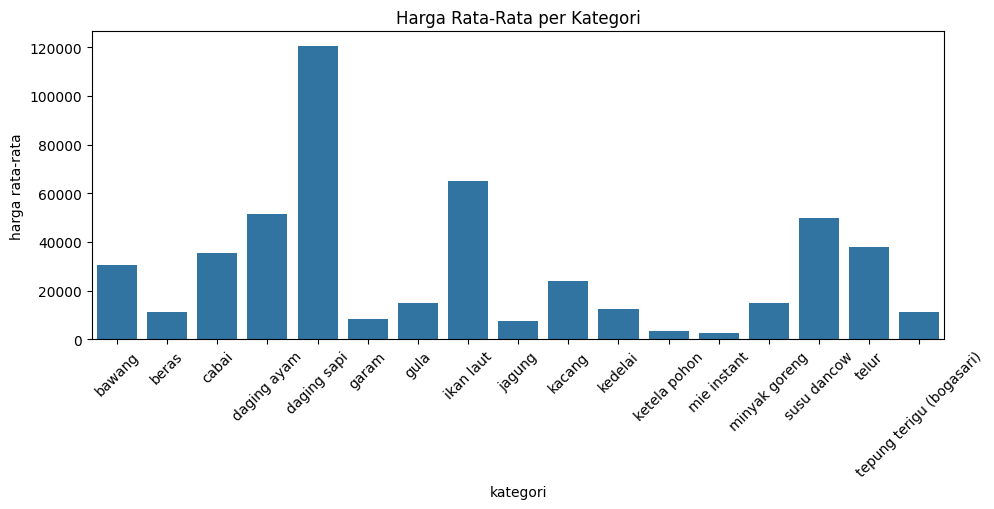

In [40]:
# Plot the average prices using a bar chart
plt.figure(figsize=(11, 4))
sns.barplot(x='kategori', y='harga', data=avg_price_per_category)
plt.title('Harga Rata-Rata per Kategori')
plt.xlabel('kategori')
plt.ylabel('harga rata-rata')
plt.xticks(rotation=45)
plt.show()


### 4. Kategori yang memiliki rata-rata standar deviasi harga tertinggi dan terendah

In [41]:
avg_std_per_category = df.groupby(['kategori', 'nama'])['harga'].std().reset_index()
avg_std_per_category.rename(columns={'harga': 'std_dev'}, inplace=True)
avg_std_per_category = avg_std_per_category.groupby('kategori')['std_dev'].mean().reset_index()
avg_std_per_category.sort_values('std_dev', ascending=False, ignore_index=True)

,kategori,std_dev
0,cabai,15814.285279
1,daging sapi,7720.111883
2,bawang,6421.566498
3,kedelai,3592.370773
4,ikan laut,3264.484865
5,minyak goreng,3250.869079
6,telur,3132.152833
7,daging ayam,2736.299573
8,susu dancow,2495.847549
9,kacang,2246.758567


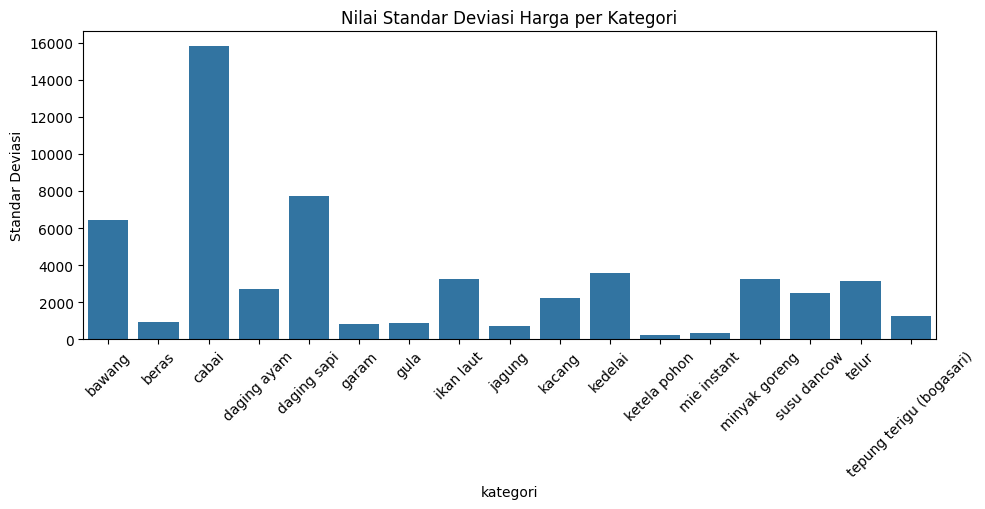

In [42]:
# Plot the average prices using a bar chart
plt.figure(figsize=(11, 4))
sns.barplot(x='kategori', y='std_dev', data=avg_std_per_category)
plt.title('Nilai Standar Deviasi Harga per Kategori')
plt.xlabel('kategori')
plt.ylabel('Standar Deviasi')
plt.xticks(rotation=45)
plt.show()


### 5. Visualisasi musiman pada data dengan standar deviasi tertinggi 

In [43]:
price_dist = df.copy()

selected_commodities = std_prices_high['nama'][:5].values

price_dist = price_dist[price_dist['nama'].isin(selected_commodities)].reset_index(drop=True)

price_dist['tanggal'] = pd.to_datetime(price_dist['tanggal'])



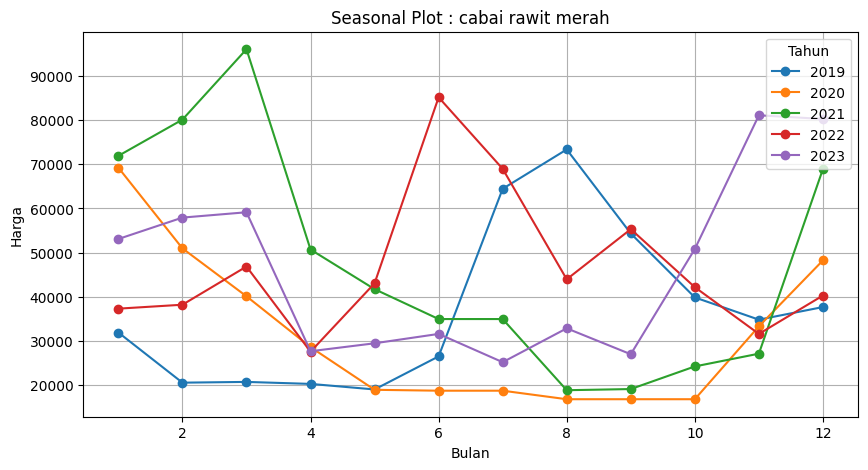

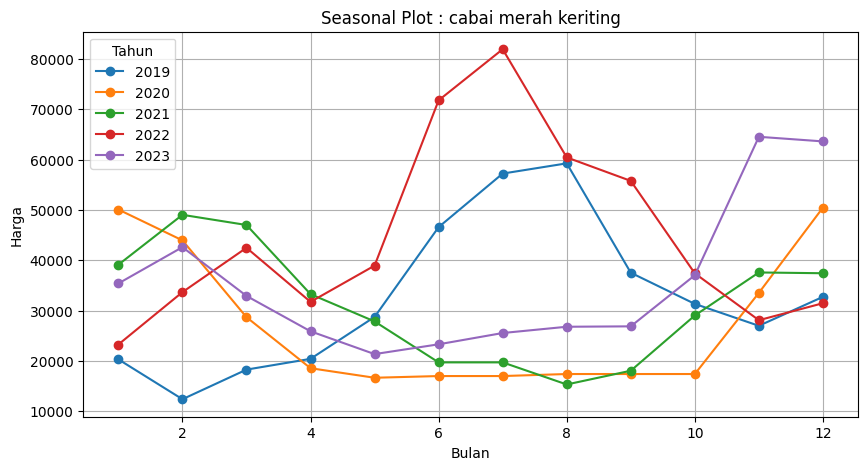

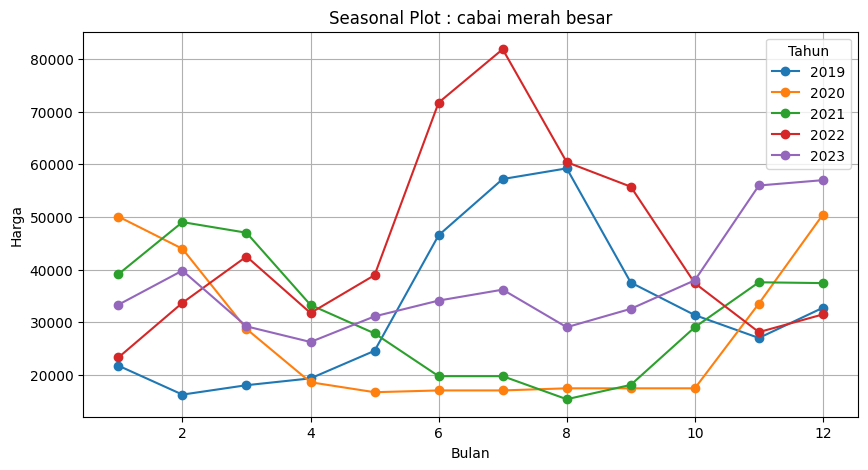

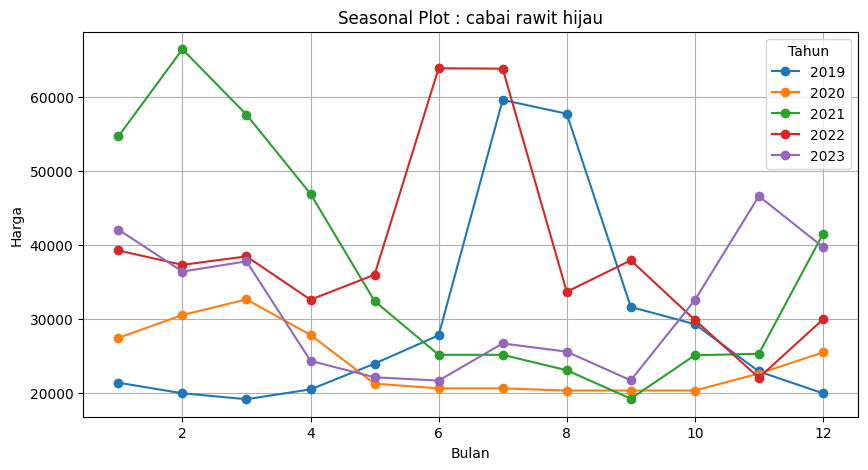

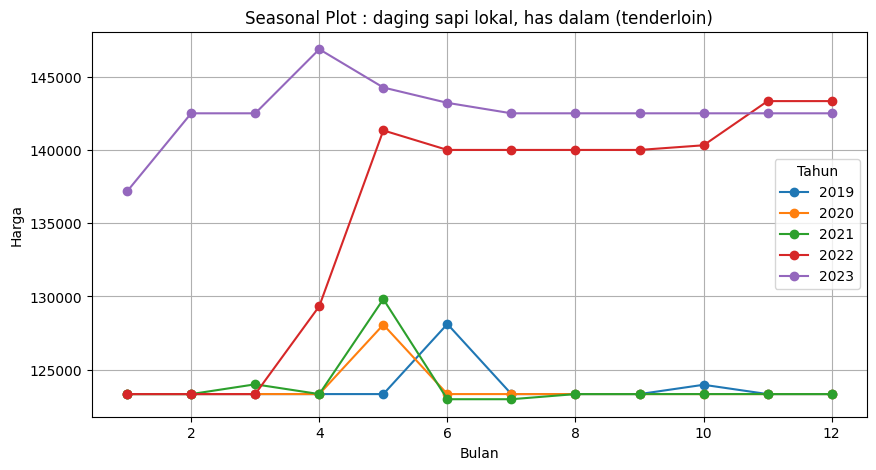

In [44]:
def seasonal_plot(df):
    df['month'] = df['tanggal'].dt.month
    df['year'] = df['tanggal'].dt.year

    plt.figure(figsize=(10, 5))
    for year in df['year'].unique():
        subset = df[df['year'] == year]
        plt.plot(subset['month'], subset['harga'], marker='o', label=year)
    plt.title(f'Seasonal Plot : {i}')
    plt.xlabel('Bulan')
    plt.ylabel('Harga')
    plt.legend(title='Tahun')
    plt.grid(True)
    plt.show()
 
for i in selected_commodities:
    commodity_data = price_dist[price_dist['nama'] == i]
    seasonal_plot(commodity_data)

### 6. Tren pada tiap kategori

In [45]:
avg_price_per_date_cat= df.groupby(['kategori', 'tanggal'])['harga'].mean().reset_index()
avg_price_per_date_cat['tanggal'] = pd.to_datetime(avg_price_per_date_cat['tanggal'])
avg_price_per_date_cat

,kategori,tanggal,harga
0,bawang,2019-01-01,25285.714286
1,bawang,2019-02-01,25789.473684
2,bawang,2019-03-01,33550.000000
3,bawang,2019-04-01,42584.795322
4,bawang,2019-05-01,37085.858586
...,...,...,...
943,tepung terigu (bogasari),2023-08-01,12666.666667
944,tepung terigu (bogasari),2023-09-01,12508.333333
945,tepung terigu (bogasari),2023-10-01,12500.000000
946,tepung terigu (bogasari),2023-11-01,12500.000000


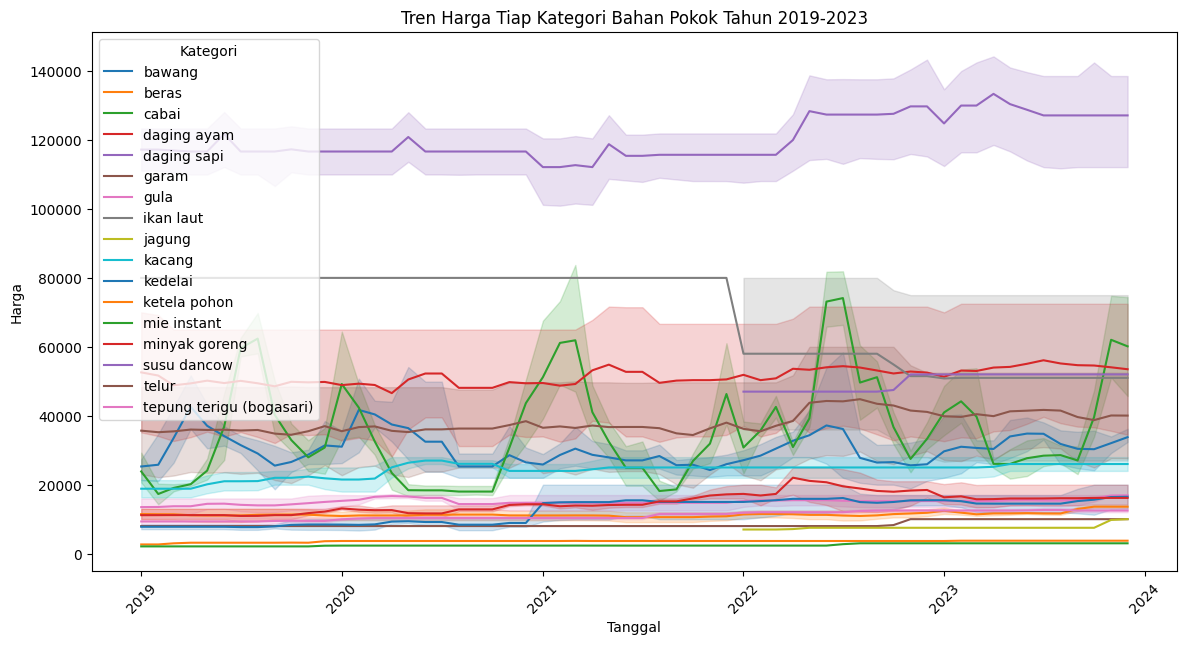

In [46]:
kategoris = avg_price_per_date_cat['kategori'].unique()

plt.figure(figsize=(14, 7))
for kategori in kategoris:
    subset = df[df['kategori'] == kategori]
    sns.lineplot(x='tanggal', y='harga', data=subset, label=kategori)
plt.title('Tren Harga Tiap Kategori Bahan Pokok Tahun 2019-2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend(title='Kategori')
plt.xticks(rotation=45)
plt.show()


### 7. Korelasi mengenai harga rata-rata pada tiap kategori

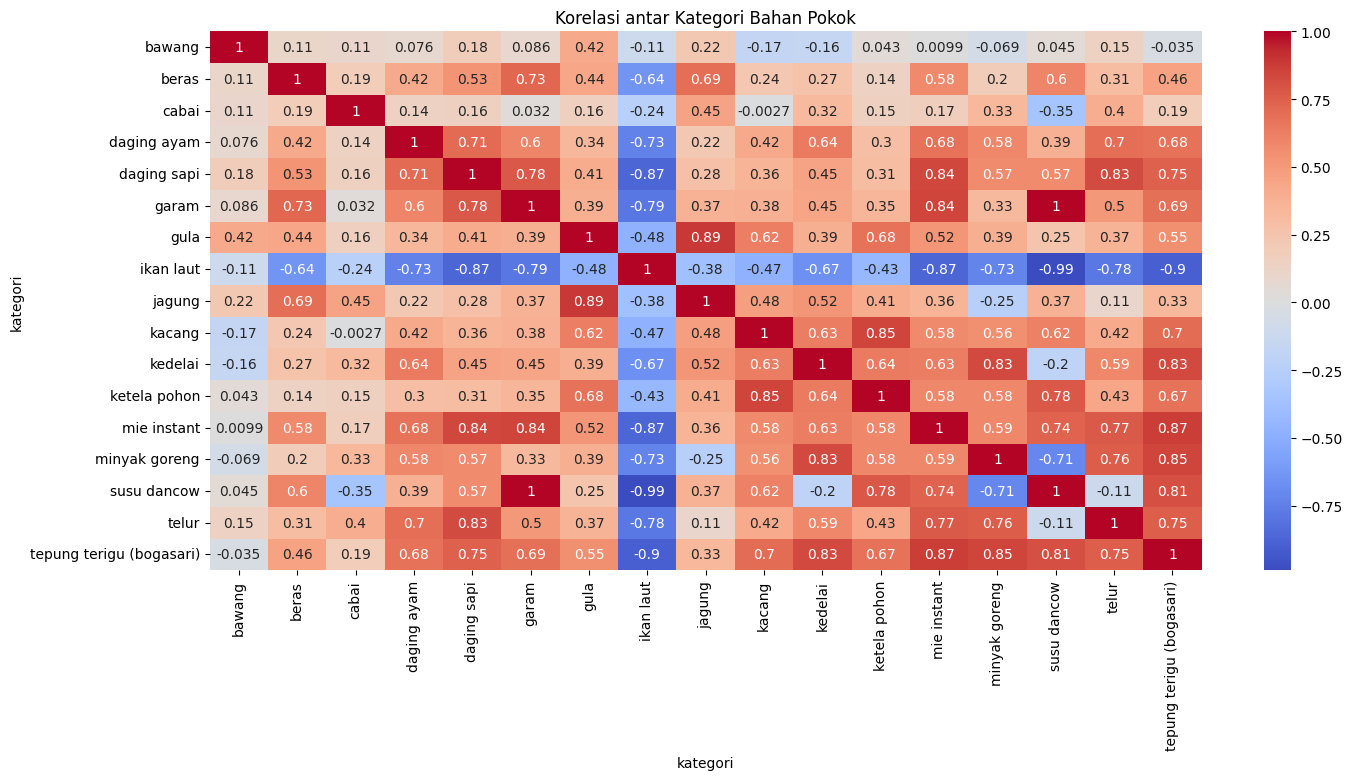

In [47]:
# avg_price_per_date_cat[avg_price_per_date_cat['kategori'] == 'bawang']['harga'].values
df_corr = avg_price_per_date_cat.pivot_table(index='tanggal', columns='kategori', values='harga')
plt.figure(figsize=(16, 7))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Kategori Bahan Pokok')
plt.show()

In [48]:
df_corr.corr()

kategori,bawang,beras,cabai,daging ayam,daging sapi,garam,gula,ikan laut,jagung,kacang,kedelai,ketela pohon,mie instant,minyak goreng,susu dancow,telur,tepung terigu (bogasari)
kategori,,,,,,,,,,,,,,,,,
bawang,1.000000,0.108896,0.105238,0.076222,0.183852,0.086016,0.422136,-0.106158,0.223658,-0.171973,-0.163943,0.042938,0.009947,-0.069479,0.045077,0.148400,-0.034780
beras,0.108896,1.000000,0.185870,0.423007,0.533540,0.725942,0.438800,-0.639993,0.689599,0.238191,0.265790,0.140294,0.580301,0.195822,0.600372,0.307993,0.458938
cabai,0.105238,0.185870,1.000000,0.140584,0.160017,0.031923,0.163013,-0.237239,0.450513,-0.002737,0.322058,0.153323,0.170686,0.333267,-0.351364,0.398460,0.186364
daging ayam,0.076222,0.423007,0.140584,1.000000,0.711045,0.599883,0.340529,-0.733921,0.223747,0.420618,0.640999,0.297872,0.676963,0.582291,0.385239,0.696602,0.677410
daging sapi,0.183852,0.533540,0.160017,0.711045,1.000000,0.775869,0.405030,-0.866514,0.280796,0.362966,0.450193,0.307370,0.844363,0.568950,0.568748,0.825914,0.748708
garam,0.086016,0.725942,0.031923,0.599883,0.775869,1.000000,0.388349,-0.792059,0.371630,0.378767,0.447135,0.349624,0.844967,0.329153,0.999817,0.504768,0.686307
gula,0.422136,0.438800,0.163013,0.340529,0.405030,0.388349,1.000000,-0.476501,0.888614,0.624346,0.391824,0.677285,0.518529,0.387826,0.254540,0.369580,0.550367
ikan laut,-0.106158,-0.639993,-0.237239,-0.733921,-0.866514,-0.792059,-0.476501,1.000000,-0.377919,-0.470678,-0.665718,-0.433742,-0.865810,-0.728563,-0.988613,-0.782535,-0.895928
jagung,0.223658,0.689599,0.450513,0.223747,0.280796,0.371630,0.888614,-0.377919,1.000000,0.477981,0.520552,0.408053,0.362543,-0.250191,0.370873,0.105455,0.332604


### 8. Perubahan harga dari komoditas

In [49]:
# Perubahan Harga Bahan Pokok dari tahun 2019 sampai 2023

df_perubahan = pd.DataFrame()
commodities = df['nama'].unique()

df_perubahan['komoditas'] = commodities
price_changes = []
naik_turun = []
for commodity in commodities:
    subset = df[df['nama'] == commodity]['harga']
    for i in range(len(subset)):
        if subset.iloc[i] != 0 and not np.isnan(subset.iloc[i]):
            price_changes.append(np.abs(subset.iloc[len(subset)-1] - subset.iloc[i]) / subset.iloc[i] * 100)
            naik_turun.append('naik' if subset.iloc[len(subset)-1] > subset.iloc[i] else 'turun')
            break
        
df_perubahan['perubahan_harga(%)'] = price_changes
df_perubahan['naik_turun'] = naik_turun
df_perubahan.sort_values('perubahan_harga(%)', ascending=False, ignore_index=True)



,komoditas,perubahan_harga(%),naik_turun
0,cabai merah keriting,213.031250,naik
1,cabai merah besar,162.500000,naik
2,cabai rawit merah,151.201541,naik
3,kedelai kuning lokal,135.294118,naik
4,minyak goreng kemasan sederhana (1 lt),90.476190,naik
5,cabai rawit hijau,85.500000,naik
6,kedelai ex. impor,83.098592,naik
7,"bawang putih impor, honan",53.287519,naik
8,gula pasir kristal putih,52.954545,naik
9,tepung terigu protein rendah,50.000000,naik


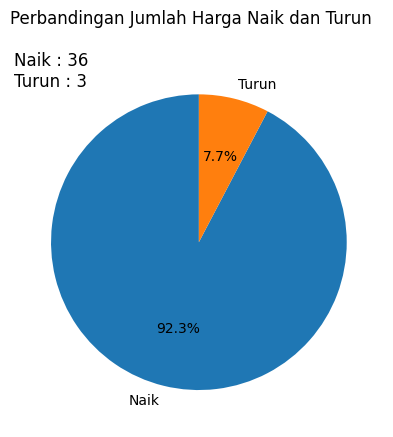

In [50]:
plt.pie(df_perubahan['naik_turun'].value_counts(), labels=['Naik', 'Turun'], autopct='%1.1f%%', startangle=90)
plt.suptitle('Perbandingan Jumlah Harga Naik dan Turun')
plt.title(f'Naik : {df_perubahan["naik_turun"].value_counts()["naik"]}\nTurun : {df_perubahan["naik_turun"].value_counts()["turun"]}',
           y = 0.9,
           loc='left')
plt.show()


In [51]:
# indeks harga tahun sebelumnya

df_copy = df.copy()
df_copy['tanggal'] = pd.to_datetime(df_copy['tanggal'])
df_copy['year'] = df_copy['tanggal'].dt.year

df_copy.drop(columns=['tanggal', 'satuan', 'kategori'], inplace=True)

df_copy = df_copy.groupby(['nama', 'year']).sum().reset_index()
df_copy.rename(columns=({'harga':'total_harga_tahunan'}), inplace=True)
df_copy['indeks_harga_tahun_sebelum'] = df_copy['total_harga_tahunan'] / df_copy.groupby('nama')['total_harga_tahunan'].shift(1) * 100
# drop row with nan value
df_copy.dropna(inplace=True)
df_copy.drop(df_copy[df_copy['indeks_harga_tahun_sebelum'] == np.inf].index, inplace=True)
df_copy

,nama,year,total_harga_tahunan,indeks_harga_tahun_sebelum
1,bawang merah lokal,2020,450163.807264,128.880291
2,bawang merah lokal,2021,355819.052734,79.042128
3,bawang merah lokal,2022,449273.929774,126.264720
4,bawang merah lokal,2023,393860.040266,87.665901
6,"bawang putih impor, honan",2020,328742.815170,96.587318
...,...,...,...,...
180,tepung terigu protein sedang,2023,149596.428571,102.291941
182,tepung terigu protein tinggi,2020,131105.263158,104.051796
183,tepung terigu protein tinggi,2021,137000.000000,104.496186
184,tepung terigu protein tinggi,2022,152244.588745,111.127437


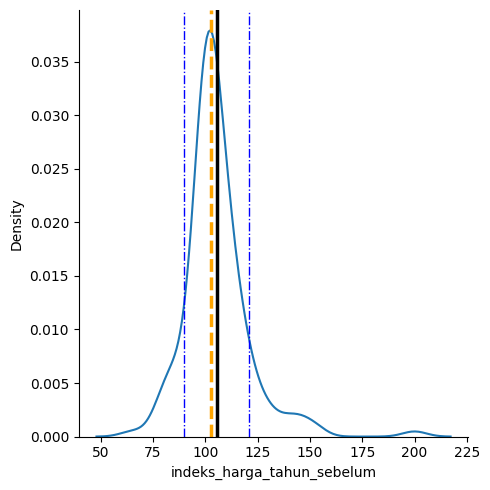

In [52]:
g = sns.displot(data=df_copy, x = 'indeks_harga_tahun_sebelum', kind='kde', facet_kws=dict(sharey=False, sharex=False))

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)
    plt.axvline(x.mean() + x.std(), c='b', ls='-.', lw=1)
    plt.axvline(x.mean() - x.std(), c='b', ls='-.', lw=1)

g.map(specs, 'indeks_harga_tahun_sebelum')



### 9. Kenaikan harga tertinggi pada tiap tahun di setiap kategorinya

In [53]:
highest_price_increase_df = df.copy()
highest_price_increase_df['tanggal'] = pd.to_datetime(highest_price_increase_df['tanggal'])
highest_price_increase_df['year'] = highest_price_increase_df['tanggal'].dt.year
highest_price_increase_df.drop(['satuan', 'kategori'], axis=1, inplace=True)

dict_max_perubahan = {}
for commodity in commodities:
    subset = highest_price_increase_df[highest_price_increase_df['nama'] == commodity]
    subset['harga_sebelumnya'] = highest_price_increase_df.groupby('nama')['harga'].shift(1)
    subset.dropna(inplace=True)
    subset['perubahan_harga'] = subset['harga'] - subset['harga_sebelumnya']
    grouped = subset.groupby(['nama', 'year'])
    idx = grouped['perubahan_harga'].idxmax()
    dict_max_perubahan[commodity] = subset.loc[idx] 

price_increase_df = pd.DataFrame()
for i in dict_max_perubahan:
    price_increase_df = pd.concat([price_increase_df, dict_max_perubahan[i]]).reset_index(drop=True)

price_increase_df.drop(columns='harga_sebelumnya', inplace=True)
price_increase_df

,tanggal,nama,harga,year,perubahan_harga
0,2019-02-01,beras ir64 (kw premium),13000.000000,2019,0.000000
1,2020-06-01,beras ir64 (kw premium),12858.906526,2020,358.906526
2,2021-01-01,beras ir64 (kw premium),12500.000000,2021,0.000000
3,2022-01-01,beras ir64 (kw premium),12380.952381,2022,380.952381
4,2023-09-01,beras ir64 (kw premium),12350.000000,2023,1085.294118
...,...,...,...,...,...
179,2023-11-01,jagung,9779.411765,2023,2279.411765
180,2022-02-01,ikan laut kembung,36000.000000,2022,0.000000
181,2023-02-01,ikan laut kembung,27000.000000,2023,333.333333
182,2022-11-01,susu dancow,52000.000000,2022,4523.809524


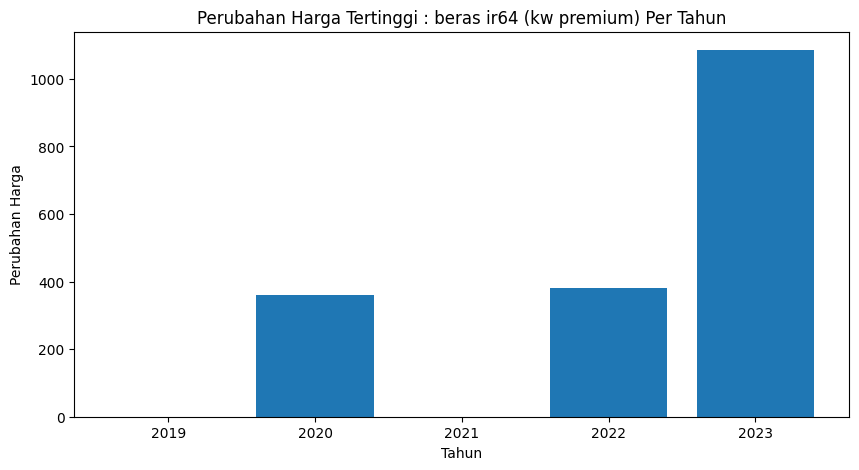

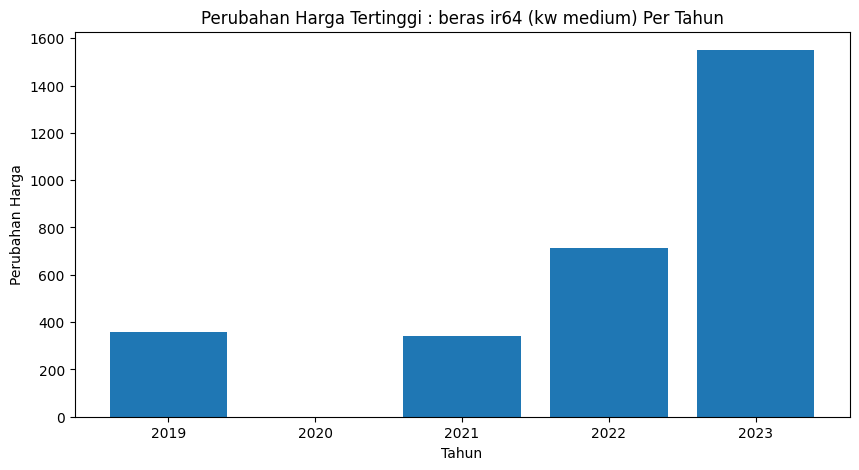

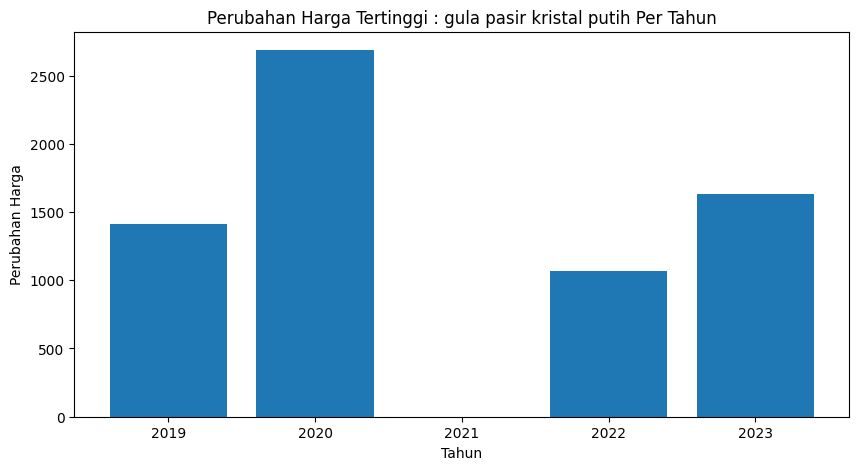

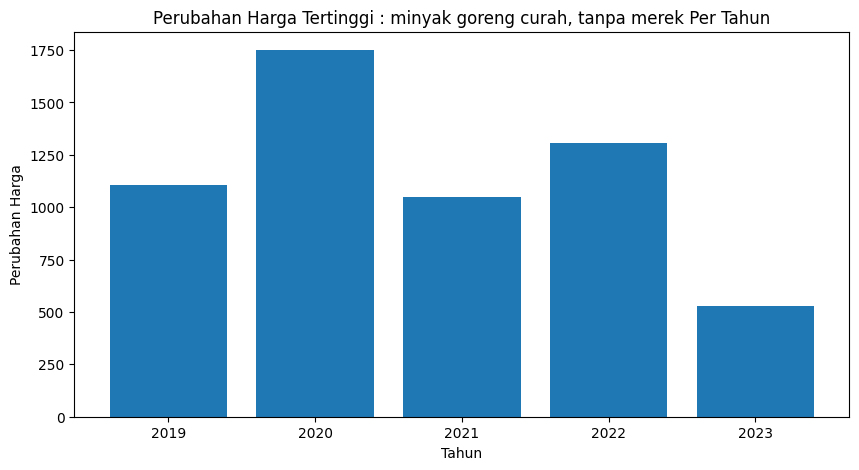

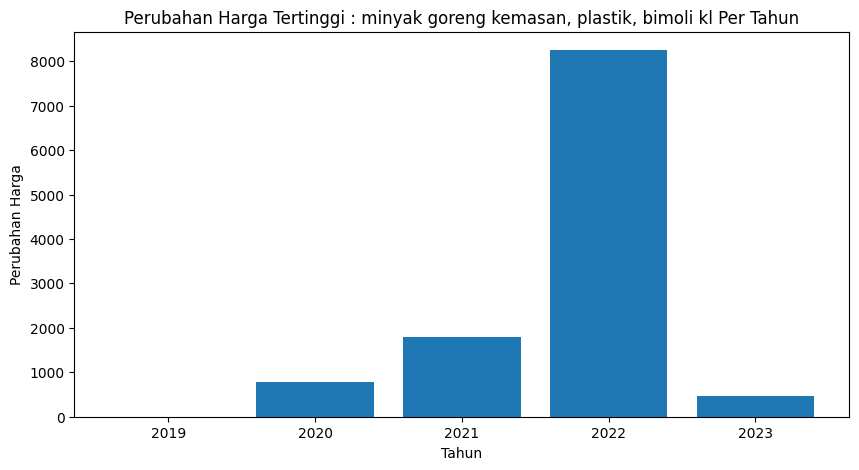

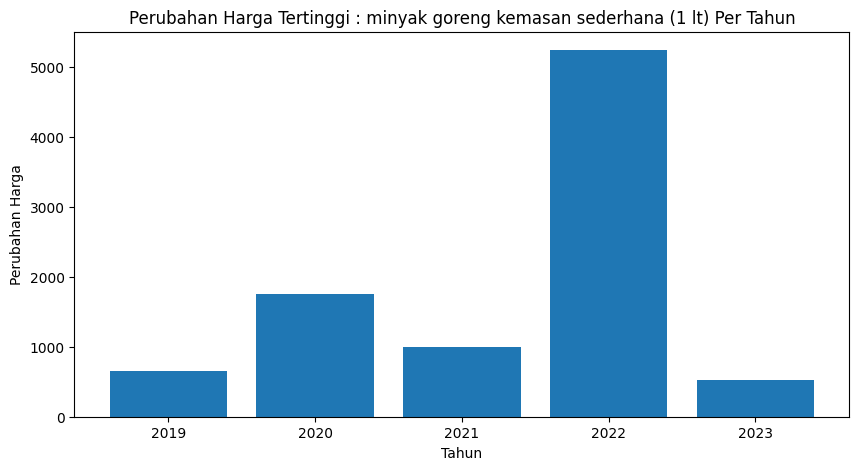

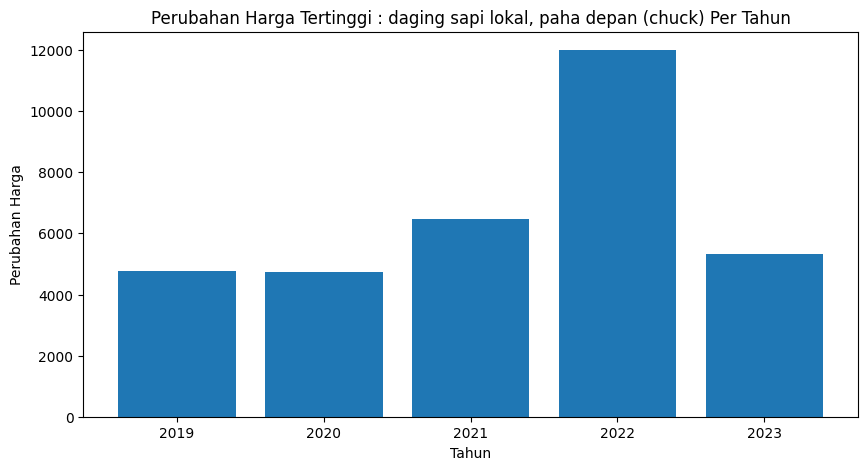

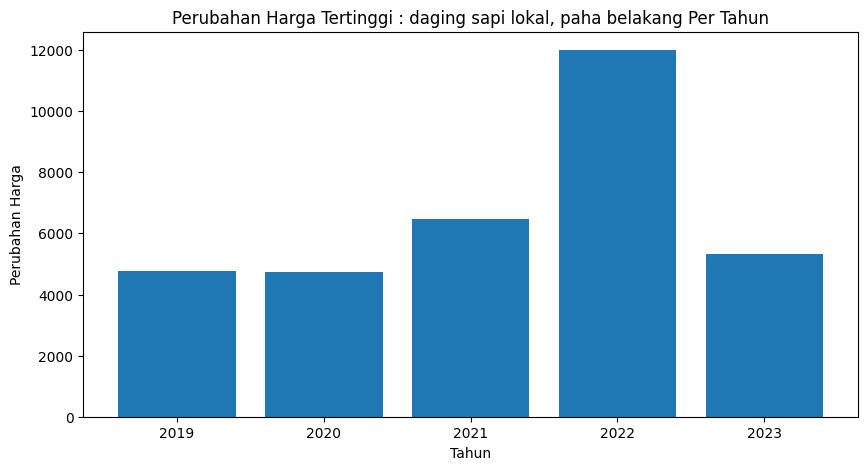

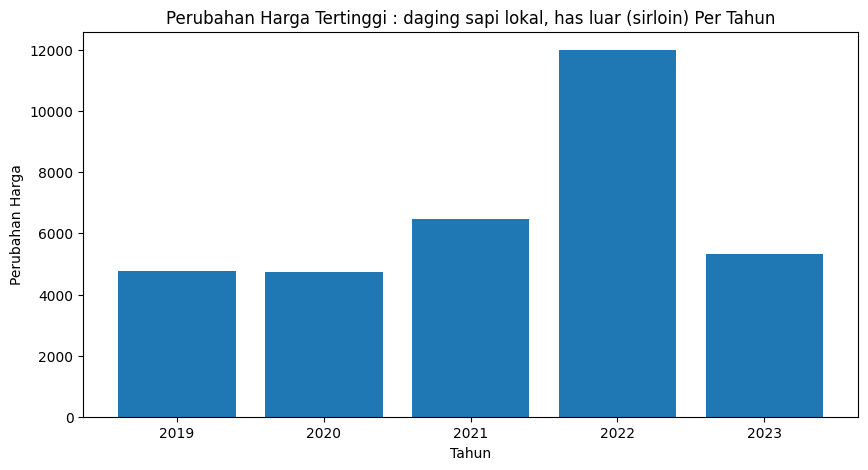

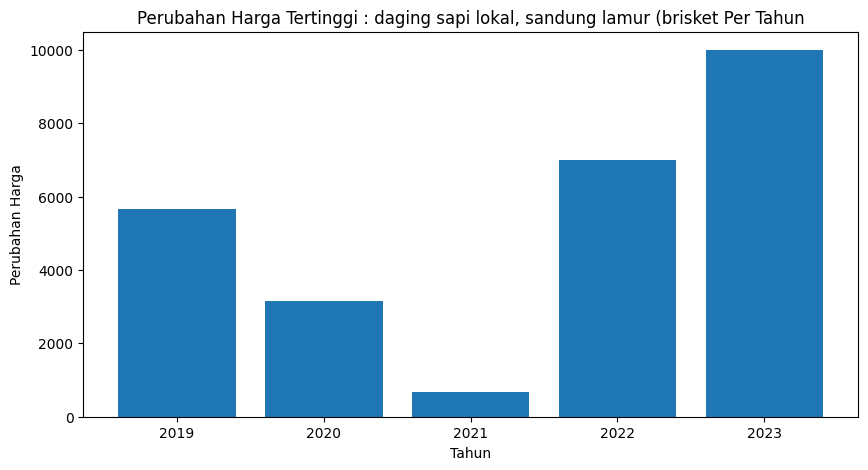

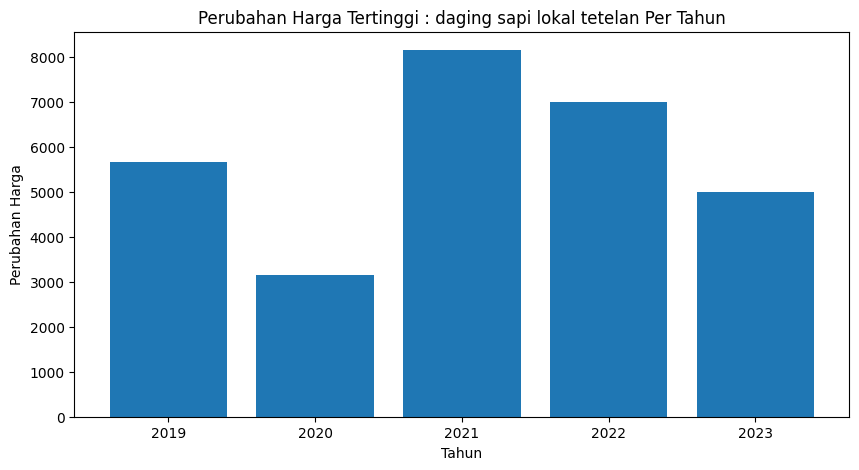

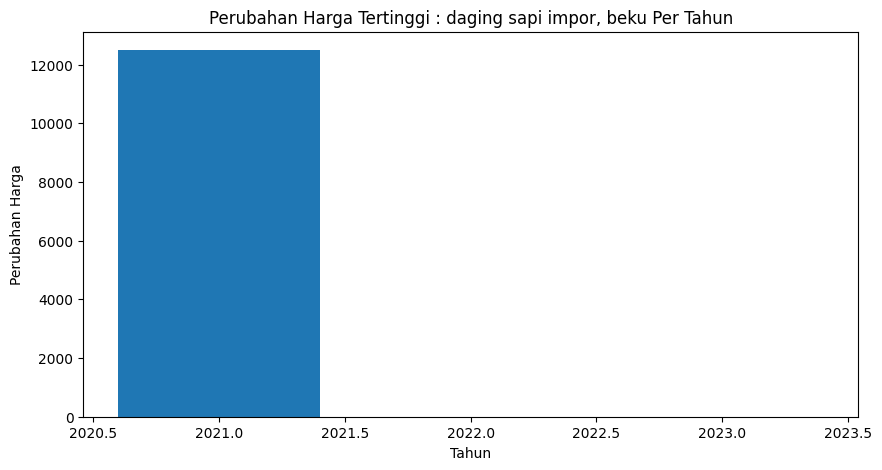

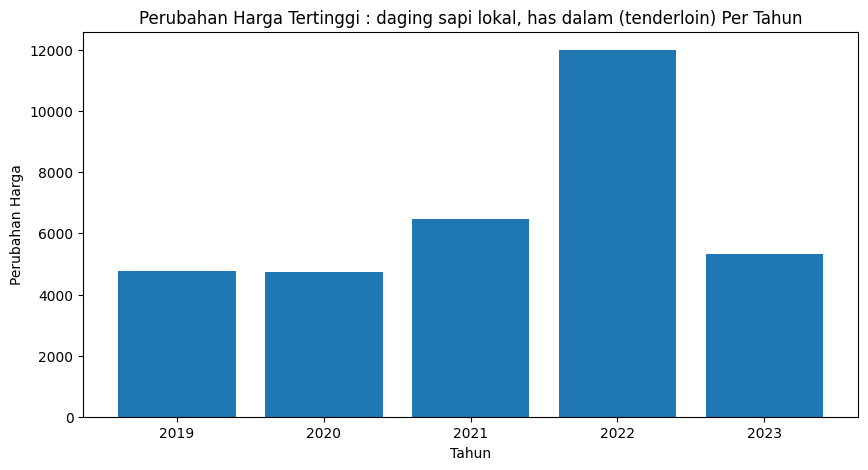

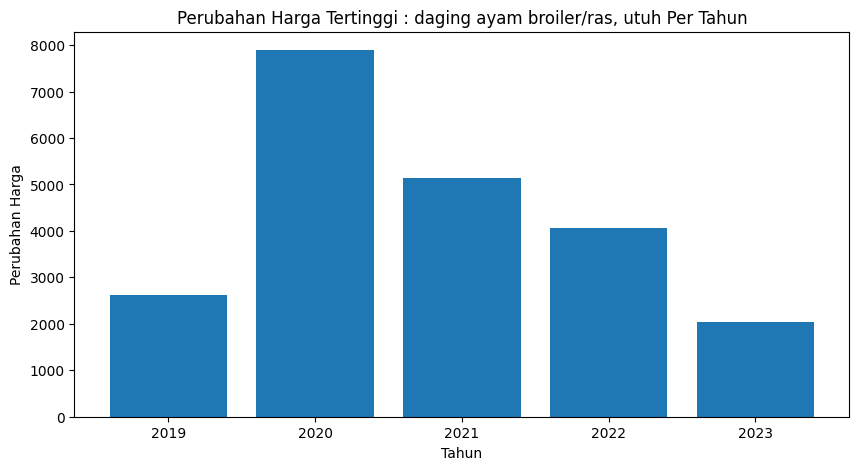

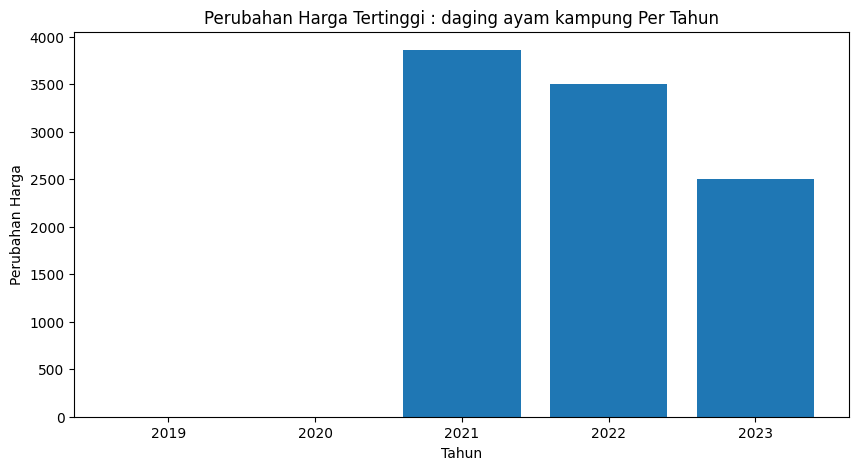

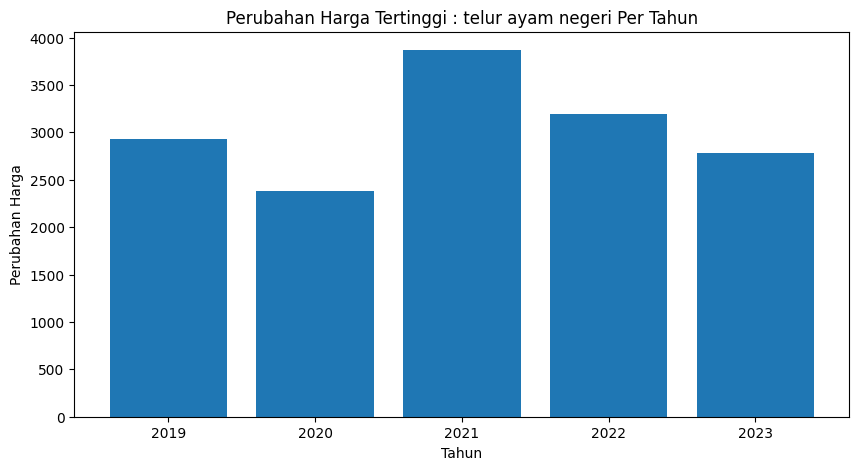

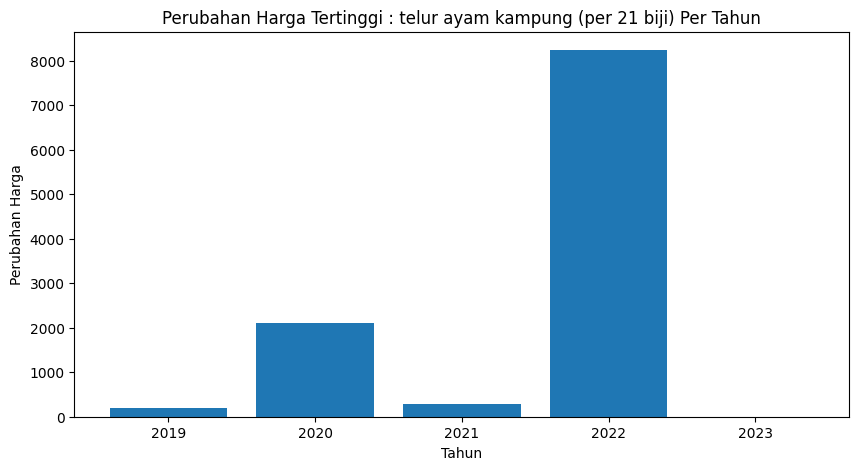

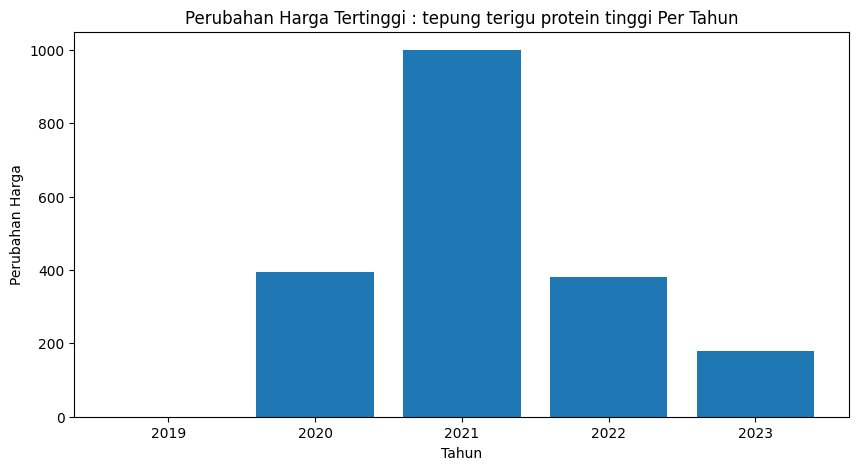

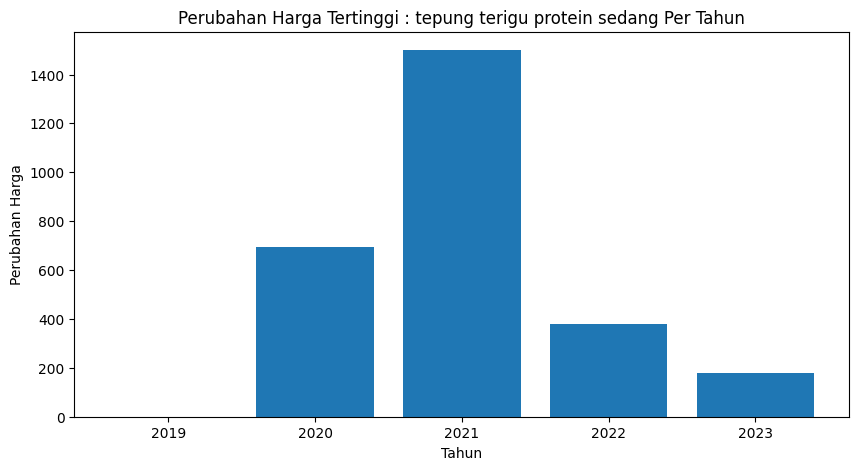

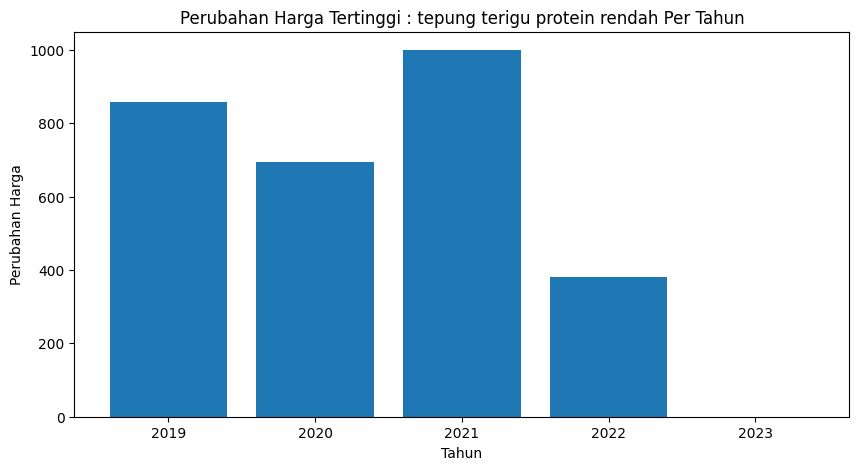

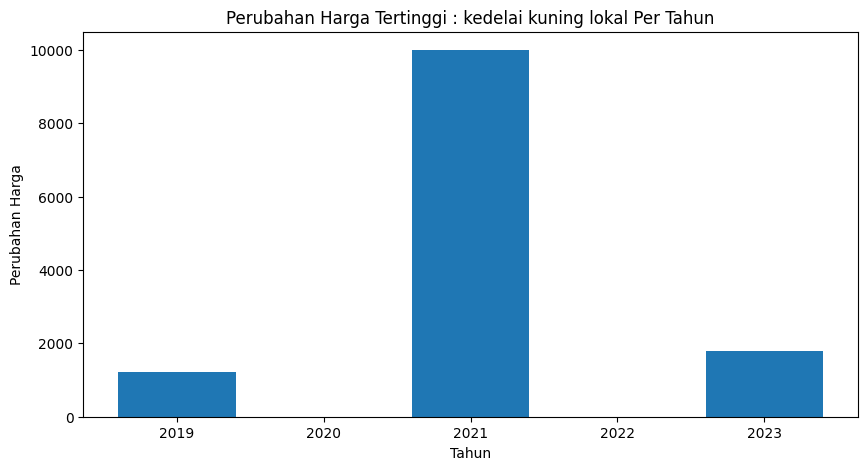

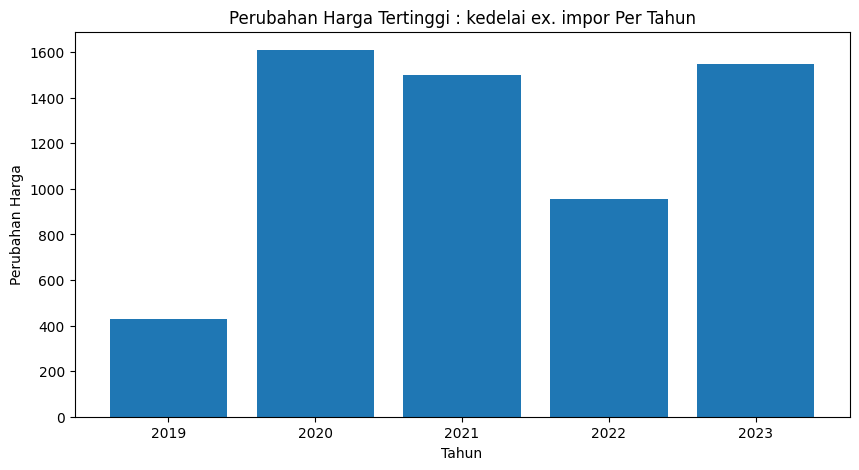

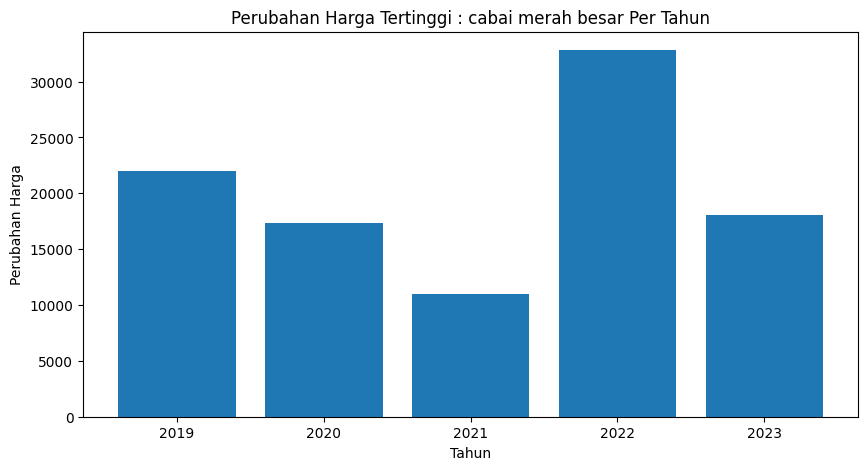

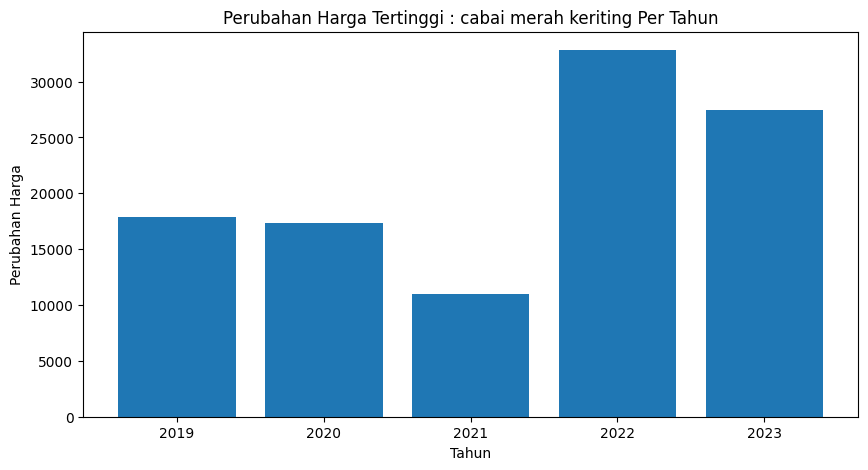

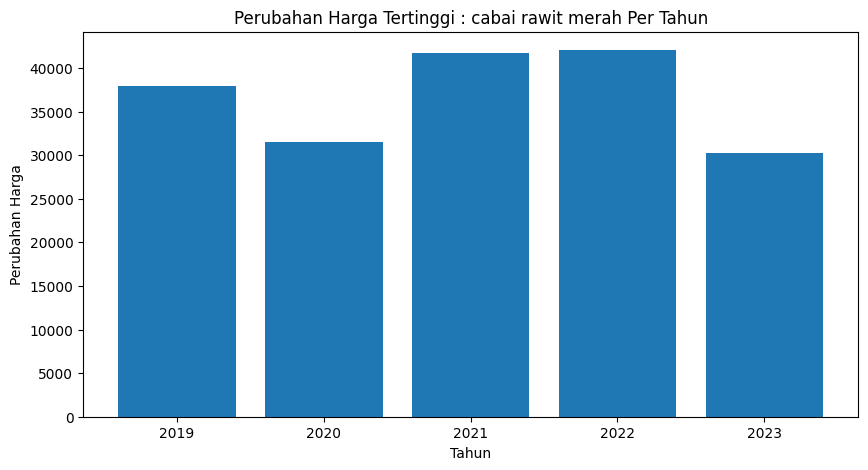

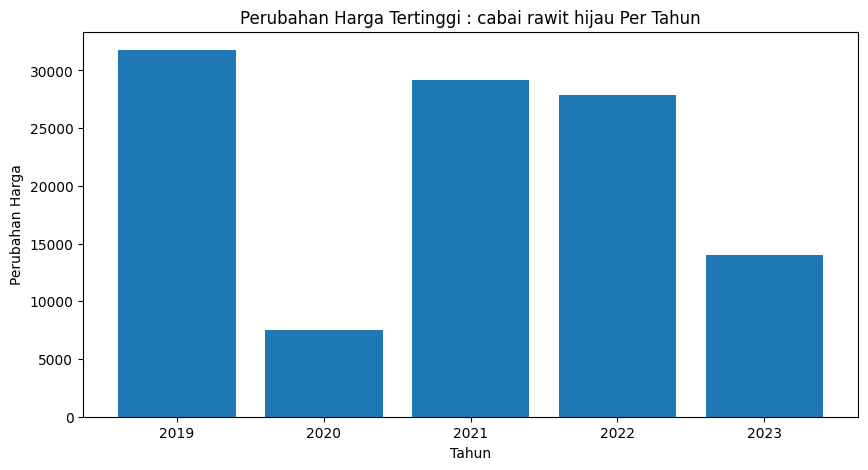

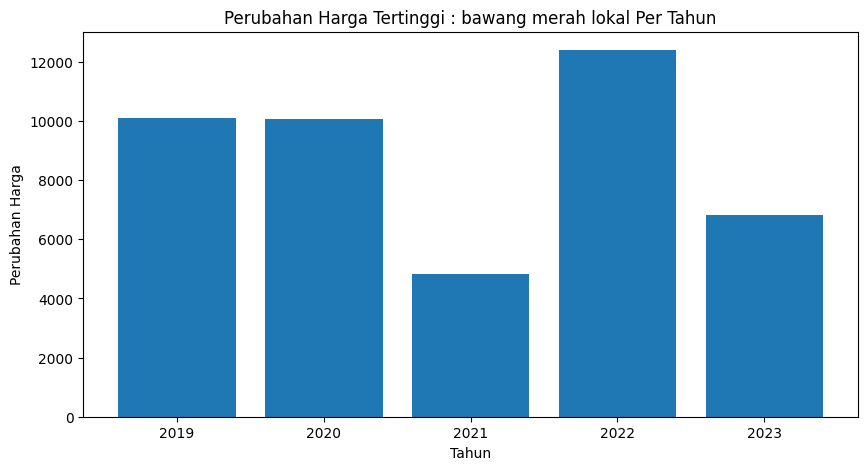

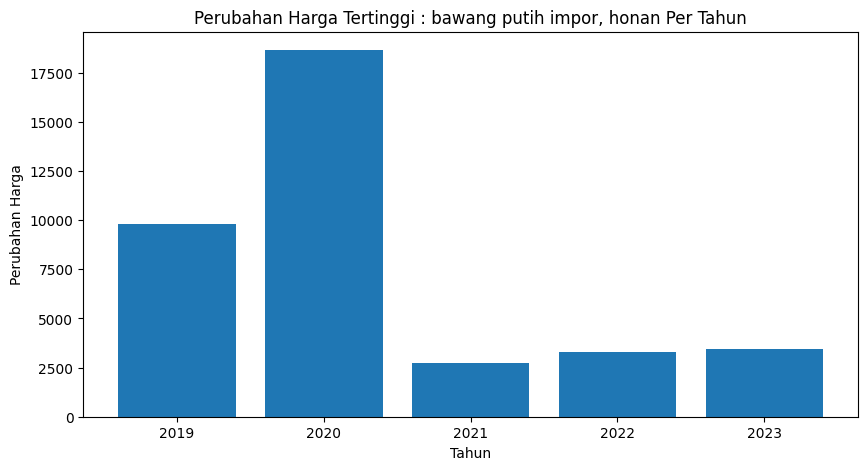

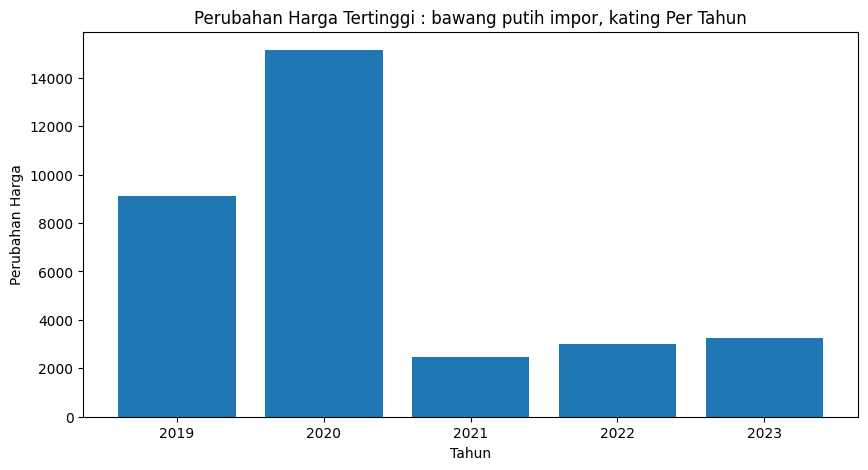

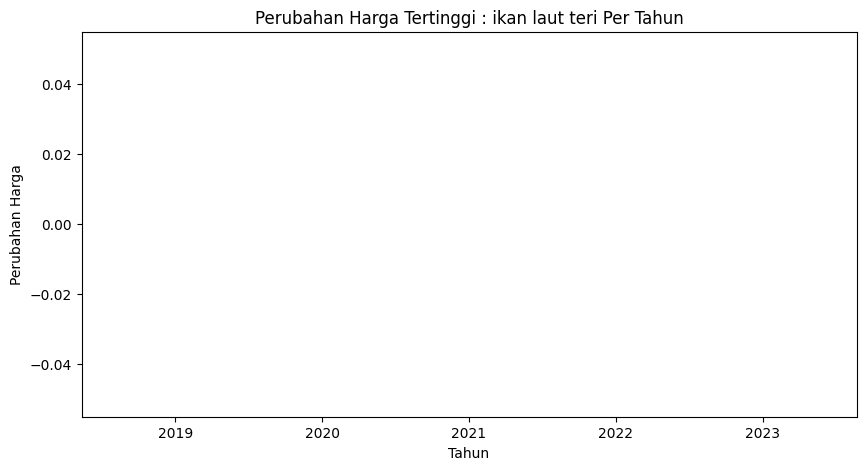

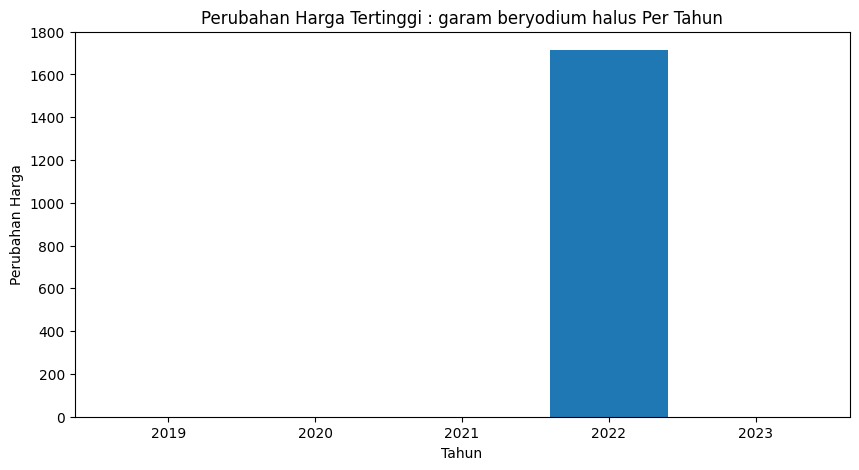

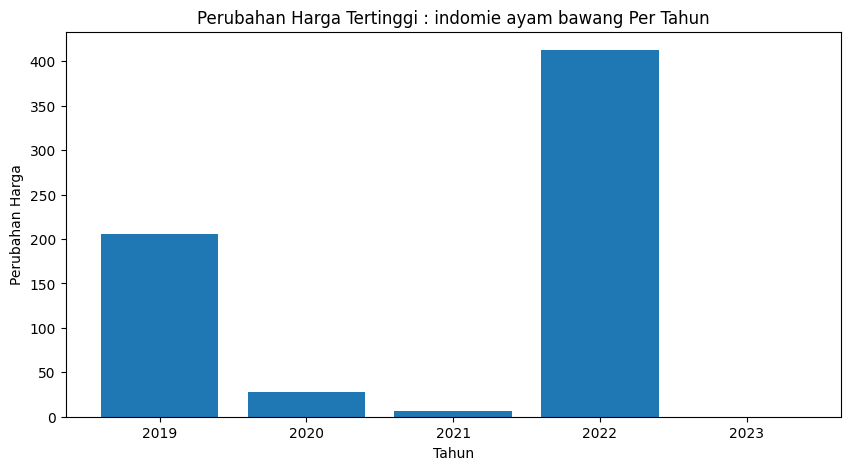

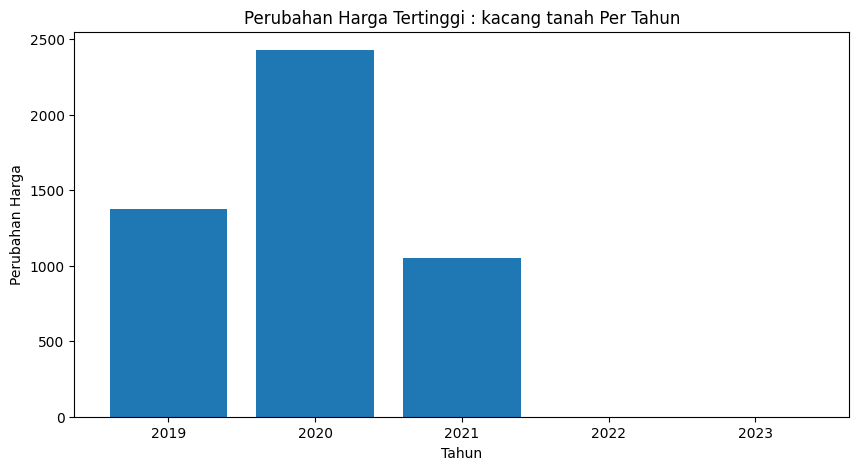

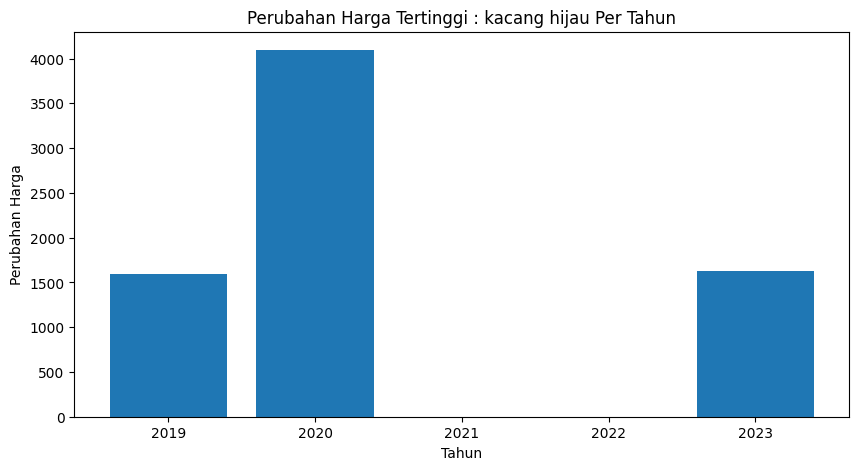

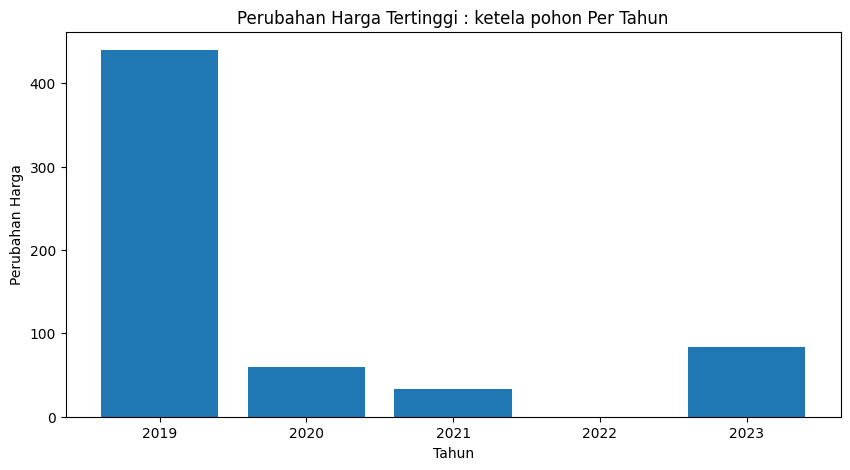

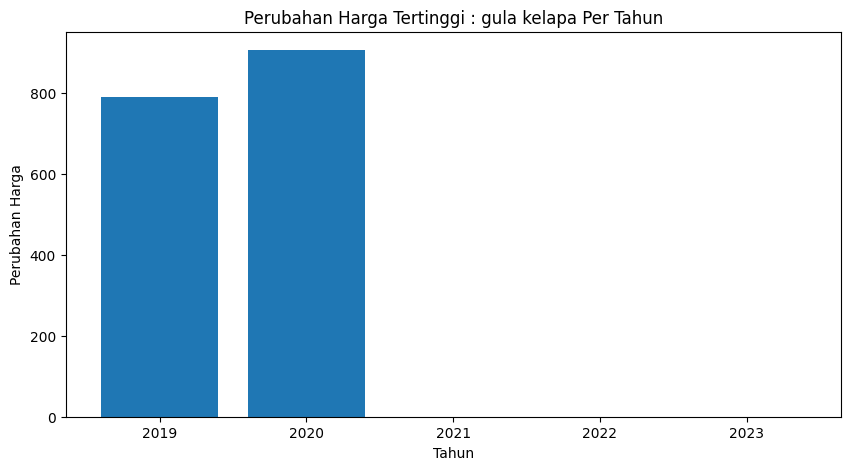

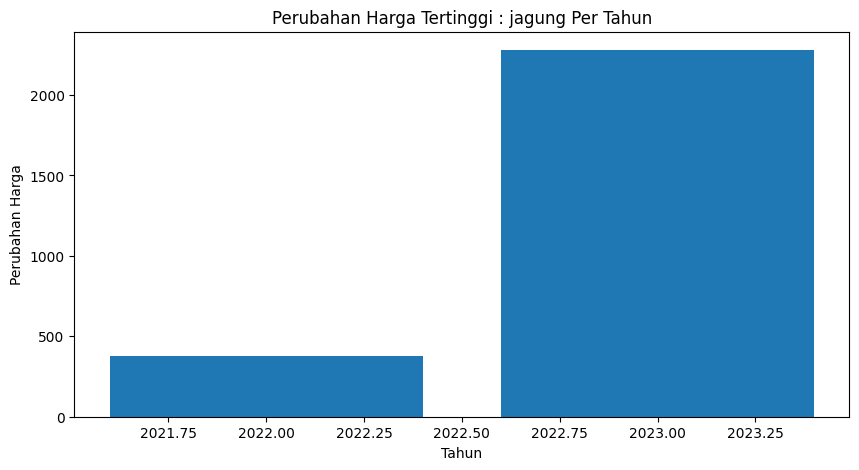

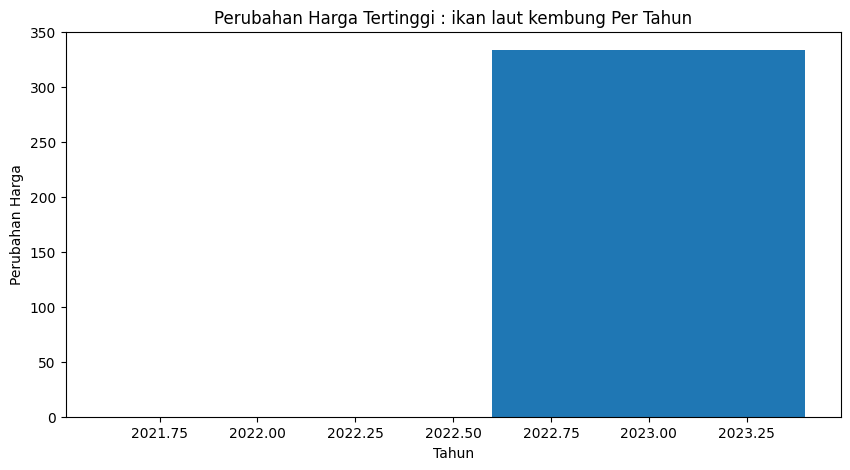

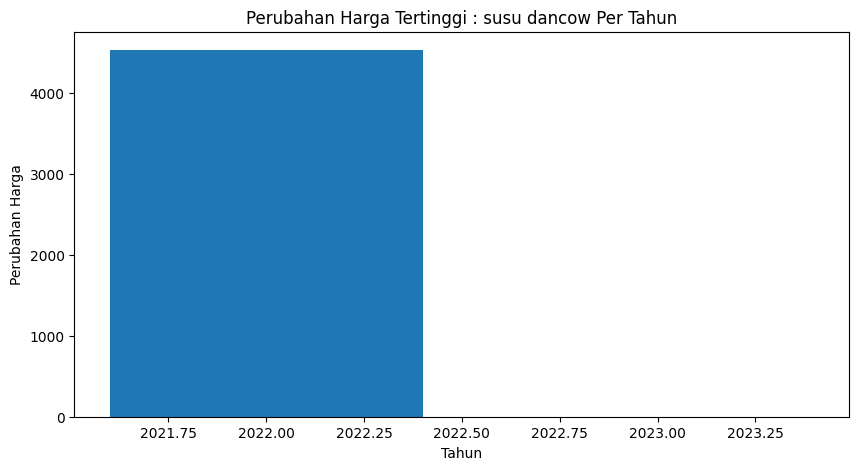

In [54]:
for i in commodities:
    subset = price_increase_df[price_increase_df['nama'] == i]
    plt.figure(figsize=(10, 5))
    plt.bar(subset['year'], subset['perubahan_harga'])
    plt.title(f'Perubahan Harga Tertinggi : {i} Per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Perubahan Harga')
    #show perubahan_harga value
    plt.show()

In [90]:
import calendar
price_increase_df['bulan'] = price_increase_df['tanggal'].dt.month
price_increase_df['bulan'] = price_increase_df['bulan'].apply(lambda x: calendar.month_abbr[x])
month_high_price = price_increase_df.groupby('bulan')['bulan'].count().sort_values(ascending=False)
month_high_price

bulan
Jan    45
May    31
Feb    23
Nov    19
Jun    14
Mar    11
Apr    11
Aug     7
Jul     7
Oct     6
Sep     6
Dec     4
Name: bulan, dtype: int64

In [91]:
month_high_price = month_high_price.to_frame()

month_high_price

,bulan
bulan,
Jan,45
May,31
Feb,23
Nov,19
Jun,14
Mar,11
Apr,11
Aug,7
Jul,7


In [92]:
month_high_price.rename(columns={'bulan':'jumlah'}, inplace=True)
month_high_price['bulan'] = month_high_price.index
month_high_price.reset_index(drop=True,inplace=True)


month_high_price


,bulan
0,Jan
1,May
2,Feb
3,Nov
4,Jun
5,Mar
6,Apr
7,Aug
8,Jul
9,Oct
